In [1]:
# Installations
import sys
if 'google.colab' in sys.modules:
    !pip install emoji --upgrade
    !pip install pandas-profiling==2.*
    !pip install plotly==4.*
    !python -m spacy download en_core_web_lg
    !pip install pyldavis
    !pip install gensim
    !pip install chart_studio
    !pip install --upgrade autopep8

In [2]:
#!pip install emoji --upgrade
#!pip install pandas-profiling==2.*
#!pip install plotly==4.*
#!python -m spacy download en_core_web_lg
#!pip install pyldavis
#!pip install gensim
#!pip install chart_studio
#!pip install --upgrade autopep8

In [3]:
#!pip install pyldavis.gensim

In [4]:
# Required Libraries

import tweepy
#Base and Cleaning 
import json
import requests
import pandas as pd
import numpy as np
import emoji
import regex
import re
import string
from collections import Counter

#Visualizations
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt 
#import pyldavis.gensim
import pyLDAvis
#import pyLDAvis.gensim_models as gensimvis
import pyLDAvis.gensim_models 
pyLDAvis.enable_notebook()

import chart_studio
import chart_studio.plotly as py 
import chart_studio.tools as tls

#Natural Language Processing (NLP)
import spacy
import gensim
from spacy.tokenizer import Tokenizer
from gensim.corpora import Dictionary
from gensim.models.ldamulticore import LdaMulticore
from gensim.models.coherencemodel import CoherenceModel
from gensim.parsing.preprocessing import STOPWORDS as SW
from sklearn.decomposition import LatentDirichletAllocation, TruncatedSVD
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import GridSearchCV
from pprint import pprint
from wordcloud import STOPWORDS
stopwords = set(STOPWORDS)

C:\Users\adity\anaconda3\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
C:\Users\adity\anaconda3\lib\site-packages\gensim\matutils.py:22: DeprecationWarning: Please use `triu` from the `scipy.linalg` namespace, the `scipy.linalg.special_matrices` namespace is deprecated.
  from scipy.linalg.special_matrices import triu


In [5]:
from textblob import TextBlob
import sys
import tweepy
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os
import nltk
import pycountry
import re
import string
from wordcloud import WordCloud, STOPWORDS
from PIL import Image
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from langdetect import detect
from nltk.stem import SnowballStemmer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from sklearn.feature_extraction.text import CountVectorizer

In [6]:
# Authentication
consumerKey = "ArVJvbLPcQdIDWV2m42YME16F"
consumerSecret = "izc6tDOHziTAYkYjzoRUyLhlNmFD7CubR3nfWGzlDDttO6RZdf"
accessToken = "955481742231523328-zsC80wUB7rMD2POiCaJ1F2chDY6mhhU"
accessTokenSecret = "pW1YMx5b85cNaMe2NJD2576Y5bMbdkur0bSC45eLQ8hRs"
auth = tweepy.OAuthHandler(consumerKey, consumerSecret)
auth.set_access_token(accessToken, accessTokenSecret)
api = tweepy.API(auth)


#client = tweepy.Client(consumer_key= consumerKey,consumer_secret= consumerSecret,access_token= accessToken,access_token_secret= accessTokenSecret)
#query = 'crime'
#tweets = client.search_recent_tweets(query=query, max_results=20)
#for tweet in tweets.data:
#    print(tweet.text)

C:\Users\adity\anaconda3\lib\site-packages\tweepy\auth.py:120: DeprecationWarning: OAuthHandler is deprecated; use OAuth1UserHandler instead.
  warnings.warn(


In [8]:
#Sentiment Analysis

def percentage(part,whole):
    return 100 * float(part)/float(whole)

keyword = input("Please enter keyword or hashtag to search: ")
noOfTweet = int(input ("Please enter how many tweets to analyze: "))
tweets = tweepy.Cursor(api.search_tweets, q=keyword).items(noOfTweet)
positive = 0
negative = 0
neutral = 0
polarity = 0
tweet_list = []
neutral_list = []
negative_list = []
positive_list = []
original_tweet=[]
user_loc=[]
user_neg_loc=[]
user_neu_loc=[]
user_pos_loc=[]
#users_locs = [[tweet.text, tweet.user.screen_name, tweet.user.location] for tweet in tweets]
#users_locs
tweets_copy = []
negative_tweet=[]
positive_tweet=[]
neutral_tweet=[]
tweet_lst=[]

for tweet in tweets:
    #print(tweet)
    #print(clean_text(tweet.text))
    #clean_tweet=clean_text(tweet.text)
    #print(clean_tweet)
    #original_tweet.append(tweet.text)
    
    # get tweets from the API

    # store the API responses in a list
    
    tweets_copy.append(tweet)
    
    tweet_list.append(tweet.text)
    #tweet.user.screen_name provides the user’s twitter handle associated with each tweet.    tweet.user.location
    user_loc.append(tweet.user.location)
    
    #tweet_list.append(tweet.text)
    analysis = TextBlob(tweet.text)
    score = SentimentIntensityAnalyzer().polarity_scores(tweet.text)
    neg = score['neg']
    neu = score['neu']
    pos = score['pos']
    comp = score['compound']
    polarity += analysis.sentiment.polarity
 
    if neg > pos:
        negative_tweet.append(tweet)
        negative_list.append(tweet.text)
        user_neg_loc.append(tweet.user.location)
        negative += 1
    elif pos > neg:
        positive_tweet.append(tweet)
        positive_list.append(tweet.text)
        user_pos_loc.append(tweet.user.location)
        positive += 1
 
    elif pos == neg:
        neutral_tweet.append(tweet)
        neutral_list.append(tweet.text)
        user_neu_loc.append(tweet.user.location)
        neutral += 1

positive = percentage(positive, noOfTweet)
negative = percentage(negative, noOfTweet)
neutral = percentage(neutral, noOfTweet)
polarity = percentage(polarity, noOfTweet)
positive = format(positive, '.1f')
negative = format(negative, '.1f')
neutral = format(neutral, '.1f')

Please enter keyword or hashtag to search:  crime UK
Please enter how many tweets to analyze:  2500


In [9]:
print("Postive : ", positive)
print("Negative : ", negative)
print("Neutral : ", neutral)
print("Polarity : ", polarity)

Postive :  18.4
Negative :  70.6
Neutral :  11.0
Polarity :  1.441429653435395


In [7]:
# twitter data cleaning -->

def clean_text(txt):
    txt = re.sub(r"RT[\s]+", "", txt)
    txt = txt.replace("\n", " ")
    txt = re.sub(" +", " ", txt)
    txt = re.sub(r"https?:\/\/\S+", "", txt)
    txt = re.sub(r"(@[A-Za-z0–9_]+)|[^\w\s]|#", "", txt)
    txt = emoji.replace_emoji(txt, replace='')
    txt.strip()
    return txt
# Cleaning tweet text
#df["Tweets"] = df["Tweets"].apply(clean_text)

In [11]:
len(tw_list)


13236

In [62]:
total_final_df = pd.read_csv('C:/Users/adity/Downloads/Dissertation Docs/Overall Final UK Location Tweets.csv')
tw_list=total_final_df

In [63]:
#tw_list.dropna()
#tw_list.drop_duplicates(inplace = True)
#(tw_list).dropna(inplace = True)
(tw_list).fillna('NA', inplace = True)
len(tw_list)

13236

<h3>Already Sentimental Analysis done on overall 13k tweets from UK major crime cities</h3>

In [64]:
#ALready sentimental analysis done and polarity and subjectivity derived for UK crime tweets including Major crime locations -> (Manchester, Liverpool
# Derbyshire, Sheffield, London, Newcastle, etc)

tw_list.head()

id                                    original_tweets  \
0  1562022615232946177  @ReidiculousFX If you fancy a party holiday, n...   
1  1562022300005703680  RT @mufcMPB: Kevin Trapp wants to accept Manch...   
2  1562021285051367424  RT @LocallyNews247: John Bellfield (pictured) ...   
3  1562020790257815554  John Bellfield (pictured) of the Openshaw area...   
4  1562020655662600193  RT @NormanBrennan: Folks the shooting dead of ...   

                       location    tweet_dt  \
0  Newcastle Upon Tyne, England  2022-08-23   
1                  On your left  2022-08-23   
2               London, England  2022-08-23   
3                            NA  2022-08-23   
4                            NA  2022-08-23   

                                                text  polarity  subjectivity  \
0   If you fancy a party holiday newcastle or Man...  0.000000      0.000000   
1   Kevin Trapp wants to accept Manchester United...  0.200000      0.100000   
2  247 John Bellfield pictured of the Openshaw ar...  0.000000      0.000000   
3  John Bellfield pictured of the Openshaw area o...  0.000000      0.000000   
4   Folks the shooting dead of 9yr Girl in Liverp... -0.133333      0.288889   

  sentiment    neg    neu    pos  compound  
0  positive  0.000  0.735  0.265    0.6597  
1  positive  0.000  0.794  0.206    0.3818  
2  negative  0.289  0.711  0.000   -0.8074  
3  negative  0.300  0.700  0.000   -0.8074  
4  negative  0.312  0.688  0.000   -0.8625

<h3>TOKENIZATION OF Overall 13k tweets</h3>

In [65]:
# Load spacy
# Make sure to restart the runtime after running installations and libraries tab
nlp = spacy.load('en_core_web_lg')
# Tokenizer
tokenizer = Tokenizer(nlp.vocab)


# Custom stopwords
custom_stopwords = ['hi','\n','\n\n', '&amp;', ' ', '.', '-', 'got', "it's", 'it’s', "i'm", 'i’m', 'im', 'want', 'like', '$', '@']

# Customize stop words by adding to the default list
STOP_WORDS = nlp.Defaults.stop_words.union(custom_stopwords)

# ALL_STOP_WORDS = spacy + gensim + wordcloud
ALL_STOP_WORDS = STOP_WORDS.union(SW).union(stopwords)


tokens = []

for doc in tokenizer.pipe(tw_list["text"], batch_size=500):
    doc_tokens = []    
    for token in doc: 
        if token.text.lower() not in STOP_WORDS:
            doc_tokens.append(token.text.lower())   
    tokens.append(doc_tokens)

# Makes tokens column
tw_list['tokens'] = tokens

In [1]:
tw_list

NameError: name 'tw_list' is not defined

<h3>LEMMATIZATION of tweets</h3>

In [67]:
# Make tokens a string again
tw_list['tokens_back_to_text'] = [' '.join(map(str, l)) for l in tw_list['tokens']]

def get_lemmas(text):
    '''Used to lemmatize the processed tweets'''
    lemmas = []
    
    doc = nlp(text)
    
    # Something goes here :P
    for token in doc: 
        if ((token.is_stop == False) and (token.is_punct == False)) and (token.pos_ != 'PRON'):
            lemmas.append(token.lemma_)
    
    return lemmas

tw_list['lemmas'] = tw_list['tokens_back_to_text'].apply(get_lemmas)
# Make lemmas a string again
tw_list['lemmas_back_to_text'] = [' '.join(map(str, l)) for l in tw_list['lemmas']]

# Tokenizer function
def tokenize(text):
    """
    Parses a string into a list of semantic units (words)
    Args:
        text (str): The string that the function will tokenize.
    Returns:
        list: tokens parsed out
    """
    # Removing url's
    pattern = r"http\S+"
    
    tokens = re.sub(pattern, "", text) # https://www.youtube.com/watch?v=O2onA4r5UaY
    tokens = re.sub('[^a-zA-Z 0-9]', '', text)
    tokens = re.sub('[%s]' % re.escape(string.punctuation), '', text) # Remove punctuation
    tokens = re.sub(r'\w*\d\w*', '', text) # Remove words containing numbers
    tokens = re.sub(r'@*!*\$*', '', text) # Remove @ ! $
    tokens = tokens.strip(',') # TESTING THIS LINE
    tokens = tokens.strip('?') # TESTING THIS LINE
    tokens = tokens.strip('!') # TESTING THIS LINE
    tokens = tokens.strip("'") # TESTING THIS LINE
    tokens = tokens.strip(".") # TESTING THIS LINE

    tokens = tokens.lower().split() # Make text lowercase and split it
    
    return tokens

# Apply tokenizer
tw_list['lemma_tokens'] = tw_list['lemmas_back_to_text'].apply(tokenize)

In [68]:
tw_list

id                                    original_tweets  \
0      1562022615232946177  @ReidiculousFX If you fancy a party holiday, n...   
1      1562022300005703680  RT @mufcMPB: Kevin Trapp wants to accept Manch...   
2      1562021285051367424  RT @LocallyNews247: John Bellfield (pictured) ...   
3      1562020790257815554  John Bellfield (pictured) of the Openshaw area...   
4      1562020655662600193  RT @NormanBrennan: Folks the shooting dead of ...   
...                    ...                                                ...   
13231  1558705619749797891  RT @UKBountyhunter: #SMV #Stolen #RangeRoverSp...   
13232  1558694120633384960  RT @MPSRainham: Rainham and Wennington\nHigh v...   
13233  1558692034273214465  RT @MPSRainham: Rainham and Wennington\nHigh v...   
13234  1558665492096770048  @UKBountyhunter @MPSBexley @globaltele @KentPo...   
13235  1558656607654912002  #SMV #Stolen #RangeRoverSport @MPSBexley🌓@glob...   

                           location    tweet_dt  \
0      Newcastle Upon Tyne, England  2022-08-23   
1                      On your left  2022-08-23   
2                   London, England  2022-08-23   
3                                NA  2022-08-23   
4                                NA  2022-08-23   
...                             ...         ...   
13231       mikekanyango@gmail.com   2022-08-14   
13232                            NA  2022-08-14   
13233                            NA  2022-08-14   
13234              Walsall, England  2022-08-14   
13235               Warwickshire UK  2022-08-14   

                                                    text  polarity  \
0       If you fancy a party holiday newcastle or Man...  0.000000   
1       Kevin Trapp wants to accept Manchester United...  0.200000   
2      247 John Bellfield pictured of the Openshaw ar...  0.000000   
3      John Bellfield pictured of the Openshaw area o...  0.000000   
4       Folks the shooting dead of 9yr Girl in Liverp... -0.133333   
...                                                  ...       ...   
13231   SMV Stolen RangeRoverSport Located 247365Resp...  0.000000   
13232   Rainham and Wennington High visibility cycle ...  0.160000   
13233   Rainham and Wennington High visibility cycle ...  0.160000   
13234                                      Dont you slee  0.000000   
13235  SMV Stolen RangeRoverSport Located 247365Respo...  0.000000   

       subjectivity sentiment    neg    neu    pos  compound  \
0          0.000000  positive  0.000  0.735  0.265    0.6597   
1          0.100000  positive  0.000  0.794  0.206    0.3818   
2          0.000000  negative  0.289  0.711  0.000   -0.8074   
3          0.000000  negative  0.300  0.700  0.000   -0.8074   
4          0.288889  negative  0.312  0.688  0.000   -0.8625   
...             ...       ...    ...    ...    ...       ...   
13231      0.000000  negative  0.314  0.686  0.000   -0.4939   
13232      0.540000   neutral  0.000  1.000  0.000    0.0000   
13233      0.540000   neutral  0.000  1.000  0.000    0.0000   
13234      0.000000   neutral  0.000  1.000  0.000    0.0000   
13235      0.000000  negative  0.314  0.686  0.000   -0.4939   

                                                  tokens  \
0      [fancy, party, holiday, newcastle, manchester,...   
1      [kevin, trapp, wants, accept, manchester, unit...   
2      [247, john, bellfield, pictured, openshaw, are...   
3      [john, bellfield, pictured, openshaw, area, ma...   
4      [folks, shooting, dead, 9yr, girl, liverpool, ...   
...                                                  ...   
13231  [smv, stolen, rangeroversport, located, 247365...   
13232  [rainham, wennington, high, visibility, cycle,...   
13233  [rainham, wennington, high, visibility, cycle,...   
13234                            [         , dont, slee]   
13235  [smv, stolen, rangeroversport, located, 247365...   

                                     tokens_back_to_text  \
0      fancy party holiday newcastle manchester

In [69]:
#Creating new data frames for all sentiments (positive, negative and neutral)
total_list_negative = tw_list[tw_list["sentiment"]=="negative"]
total_list_positive = tw_list[tw_list["sentiment"]=="positive"]
total_list_neutral = tw_list[tw_list["sentiment"]=="neutral"]

In [70]:
def count_values_in_column(data,feature):
    total=data.loc[:,feature].value_counts(dropna=False)
    percentage=round(data.loc[:,feature].value_counts(dropna=False,normalize=True)*100,2)
    return pd.concat([total,percentage],axis=1,keys=['Total','Percentage'])
#Count_values for sentiment

count_values_in_column(tw_list,"sentiment")

Total  Percentage
negative   9217       69.64
positive   2932       22.15
neutral    1087        8.21

In [71]:
positive=len(total_list_positive)/len(tw_list) * 100
negative=len(total_list_negative)/len(tw_list) * 100
neutral=len(total_list_neutral)/len(tw_list) * 100
#'{0:.2f}'.format(num)
positive='{0:.2f}'.format(positive)
negative='{0:.2f}'.format(negative)
neutral='{0:.2f}'.format(neutral)

keyword = 'Crime UK'

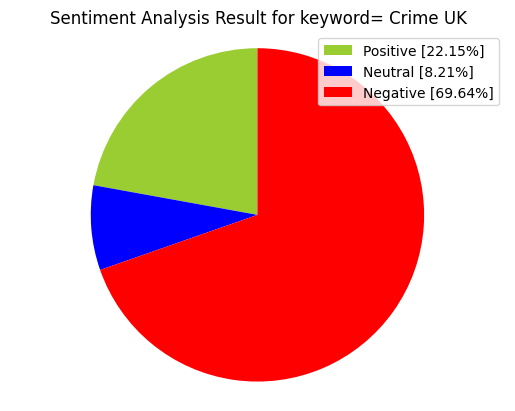

In [72]:
#Creating PieCart
labels = ['Positive ['+str(positive)+'%]' , 'Neutral ['+str(neutral)+'%]','Negative ['+str(negative)+'%]']
sizes = [positive, neutral, negative]
colors = ['yellowgreen', 'blue','red']
patches, texts = plt.pie(sizes,colors=colors, startangle=90)
plt.style.use('default')
plt.legend(labels)
plt.title("Sentiment Analysis Result for keyword= "+keyword+"" )
plt.axis('equal')
plt.show()

<AxesSubplot:xlabel='sentiment', ylabel='count'>

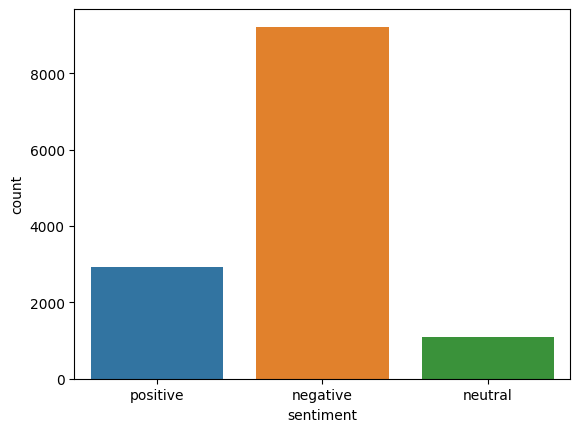

In [104]:
sns.countplot(x= 'sentiment',data = tw_list)

<h3>Frequent Words in all the type of sentiment tweets data</h3>

Text(0.5, 1.0, 'Most Frequently Occuring Words in Positive Tweets UK - Top 50')

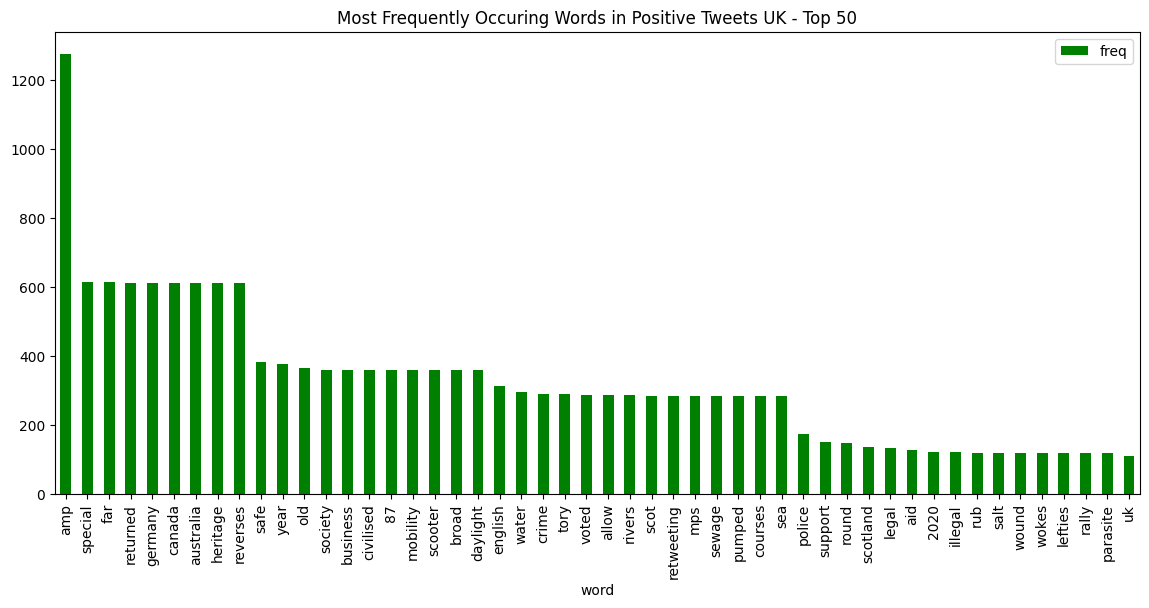

In [73]:
from sklearn.feature_extraction.text import CountVectorizer


cv = CountVectorizer(stop_words = 'english')
words = cv.fit_transform(total_list_positive.text)

sum_words = words.sum(axis=0)

positve_words_freq = [(word, sum_words[0, i]) for word, i in cv.vocabulary_.items()]
positve_words_freq = sorted(positve_words_freq, key = lambda x: x[1], reverse = True)

frequency = pd.DataFrame(positve_words_freq, columns=['word', 'freq'])

frequency.head(50).plot(x='word', y='freq', kind='bar', figsize=(14, 6), color = 'green')
plt.title("Most Frequently Occuring Words in Positive Tweets UK - Top 50")

Text(0.5, 1.0, 'Most Frequently Occuring Words in Negative Tweets UK - Top 50')

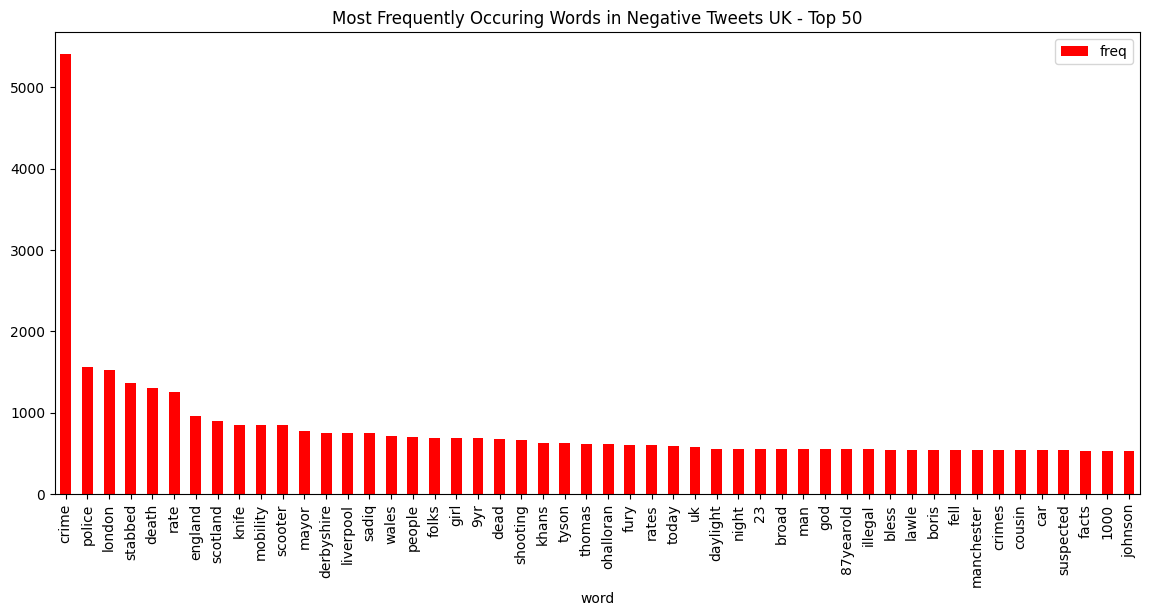

In [74]:
from sklearn.feature_extraction.text import CountVectorizer


cv = CountVectorizer(stop_words = 'english')
words = cv.fit_transform(total_list_negative.text)

sum_words = words.sum(axis=0)

negative_words_freq = [(word, sum_words[0, i]) for word, i in cv.vocabulary_.items()]
negative_words_freq = sorted(negative_words_freq, key = lambda x: x[1], reverse = True)

frequency = pd.DataFrame(negative_words_freq, columns=['word', 'freq'])

frequency.head(50).plot(x='word', y='freq', kind='bar', figsize=(14, 6), color = 'red')
plt.title("Most Frequently Occuring Words in Negative Tweets UK - Top 50")

Text(0.5, 1.0, 'Most Frequently Occuring Words in Neutral Tweets UK- Top 50')

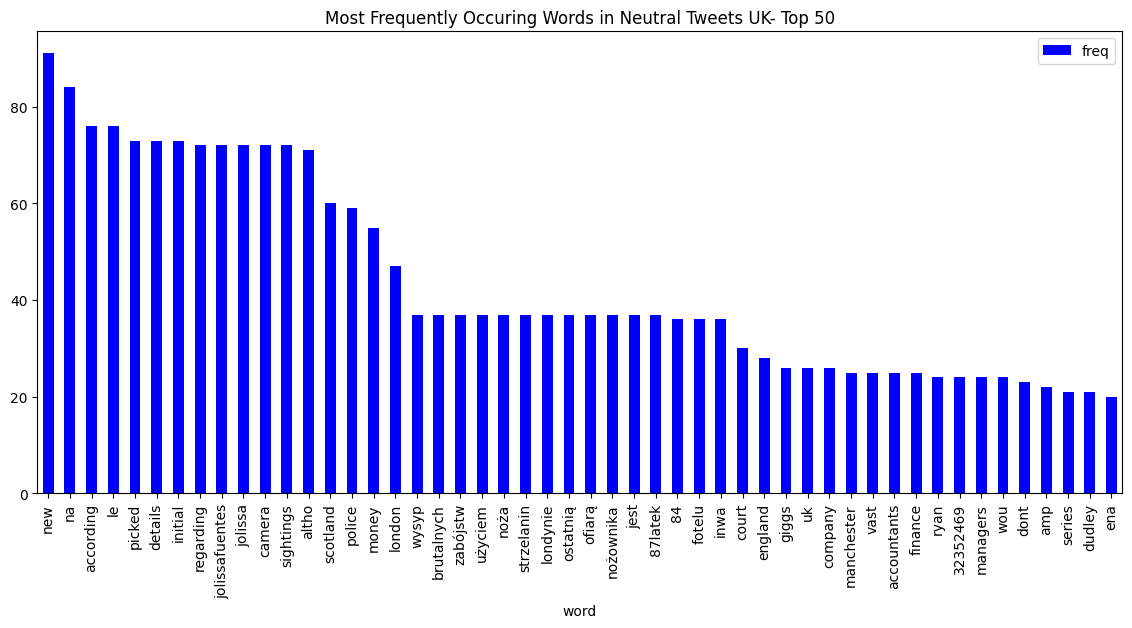

In [75]:
from sklearn.feature_extraction.text import CountVectorizer


cv = CountVectorizer(stop_words = 'english')
words = cv.fit_transform(total_list_neutral.text)

sum_words = words.sum(axis=0)

neutral_words_freq = [(word, sum_words[0, i]) for word, i in cv.vocabulary_.items()]
neutral_words_freq = sorted(neutral_words_freq, key = lambda x: x[1], reverse = True)

frequency = pd.DataFrame(neutral_words_freq, columns=['word', 'freq'])

frequency.head(50).plot(x='word', y='freq', kind='bar', figsize=(14, 6), color = 'blue')
plt.title("Most Frequently Occuring Words in Neutral Tweets UK- Top 50")

<h3>Wordcloud for positive, negative and neutral tweets</h3>

In [76]:
#from wordcloud import WordCloud

#wordcloud = WordCloud(background_color = 'white', width = 600, height = 600).generate_from_frequencies(dict(positve_words_freq))

#plt.figure(figsize=(9,7))
#plt.imshow(wordcloud)
#plt.title("WordCloud - Vocabulary from Positive UK crime Tweets", fontsize = 22)


## Create and Generate a Word Cloud Image
#wordcloud = WordCloud().generate(text)
#Display the generated image
#plt.imshow(wordcloud, interpolation="bilinear")
#plt.figure(figsize=[8,10])
#plt.axis("off")
#max_font_size=50, max_words=10, background_color="white"

C:\Users\adity\anaconda3\lib\site-packages\wordcloud\wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
C:\Users\adity\anaconda3\lib\site-packages\wordcloud\wordcloud.py:519: DeprecationWarning: ROTATE_90 is deprecated and will be removed in Pillow 10 (2023-07-01). Use Transpose.ROTATE_90 instead.
  orientation = (Image.ROTATE_90 if orientation is None else
C:\Users\adity\anaconda3\lib\site-packages\wordcloud\wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
C:\Users\adity\anaconda3\lib\site-packages\wordcloud\wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=trans

Text(0.5, 1.0, 'WordCloud - Vocabulary from Negative UK crime Tweets')

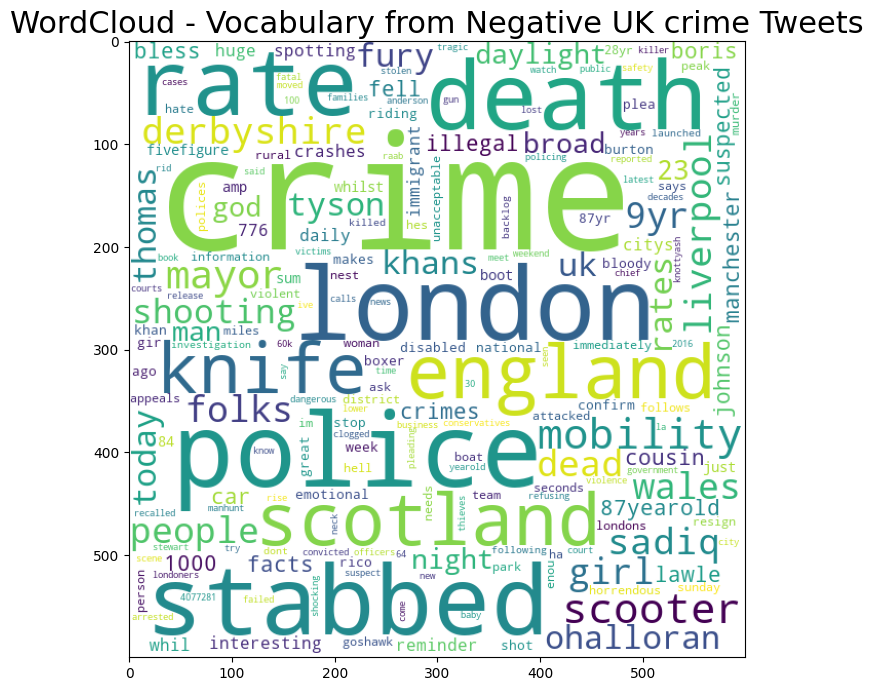

In [77]:
from wordcloud import WordCloud

wordcloud = WordCloud(background_color = 'white', width = 600, height = 600).generate_from_frequencies(dict(negative_words_freq))

plt.figure(figsize=(9,8))
plt.imshow(wordcloud)
plt.title("WordCloud - Vocabulary from Negative UK crime Tweets", fontsize = 22)

In [ ]:
from wordcloud import WordCloud

wordcloud = WordCloud(background_color = 'white', width = 600, height = 600).generate_from_frequencies(dict(neutral_words_freq))

plt.figure(figsize=(9,8))
plt.imshow(wordcloud)
plt.title("WordCloud - Vocabulary from Neutral UK crime Tweets", fontsize = 22)

In [78]:
total_list_negative

id                                    original_tweets  \
2      1562021285051367424  RT @LocallyNews247: John Bellfield (pictured) ...   
3      1562020790257815554  John Bellfield (pictured) of the Openshaw area...   
4      1562020655662600193  RT @NormanBrennan: Folks the shooting dead of ...   
6      1562013251344662529  RT @BBCNWT: A court backlog caused by Covid-19...   
7      1562012593132376065  RT @NormanBrennan: Folks the shooting dead of ...   
...                    ...                                                ...   
13226  1558744735438757888  RT @UKBountyhunter: #SMV #Stolen #RangeRoverSp...   
13228  1558744489354731520  RT @ECFRS: This photo was taken by our drone a...   
13230  1558736548870459392  RT @JonAustinjourn1: #EXCLUSIVE: Traveller bai...   
13231  1558705619749797891  RT @UKBountyhunter: #SMV #Stolen #RangeRoverSp...   
13235  1558656607654912002  #SMV #Stolen #RangeRoverSport @MPSBexley🌓@glob...   

                        location    tweet_dt  \
2                London, England  2022-08-23   
3                             NA  2022-08-23   
4                             NA  2022-08-23   
6                             NA  2022-08-23   
7                             NA  2022-08-23   
...                          ...         ...   
13226             Leicestershire  2022-08-14   
13228                      Essex  2022-08-14   
13230            London, England  2022-08-14   
13231    mikekanyango@gmail.com   2022-08-14   
13235            Warwickshire UK  2022-08-14   

                                                    text  polarity  \
2      247 John Bellfield pictured of the Openshaw ar...  0.000000   
3      John Bellfield pictured of the Openshaw area o...  0.000000   
4       Folks the shooting dead of 9yr Girl in Liverp... -0.133333   
6       A court backlog caused by Covid19 has led to ...  0.000000   
7       Folks the shooting dead of 9yr Girl in Liverp... -0.133333   
...                                                  ...       ...   
13226   SMV Stolen RangeRoverSport Located 247365Resp...  0.000000   
13228   This photo was taken by our drone at the fiel...  0.000000   
13230  1 EXCLUSIVE Traveller bailed to live at Dale F...  0.118182   
13231   SMV Stolen RangeRoverSport Located 247365Resp...  0.000000   
13235  SMV Stolen RangeRoverSport Located 247365Respo...  0.000000   

       subjectivity sentiment    neg    neu    pos  compound  \
2          0.000000  negative  0.289  0.711  0.000   -0.8074   
3          0.000000  negative  0.300  0.700  0.000   -0.8074   
4          0.288889  negative  0.312  0.688  0.000   -0.8625   
6          0.000000  negative  0.179  0.821  0.000   -0.5423   
7          0.288889  negative  0.312  0.688  0.000   -0.8625   
...             ...       ...    ...    ...    ...       ...   
13226      0.000000  negative  0.314  0.686  0.000   -0.4939   
13228      0.000000  negative  0.091  0.909  0.000   -0.3400   
13230      0.450000  negative  0.123  0.775  0.102   -0.1197   
13231      0.000000  negative  0.314  0.686  0.000   -0.4939   
13235      0.000000  negative  0.314  0.686  0.000   -0.4939   

                                                  tokens  \
2      [247, john, bellfield, pictured, openshaw, are...   
3      [john, bellfield, pictured, openshaw, area, ma...   
4      [folks, shooting, dead, 9yr, girl, liverpool, ...   
6      [court, backlog, caused, covid19, led, rise, k...   
7      [folks, shooting, dead, 9yr, girl, liverpool, ...   
...                                                  ...   
13226  [smv, stolen, rangeroversport, located, 247365...   
13228  [photo, taken, drone, field, fire, broomfield,...   
13230  [1, exclusive, traveller, bailed, live, dale, ...   
13231  [smv, stolen, rangeroversport, located, 247365...   
13235  [smv, stolen, rangeroversport, located, 247365...   

                                     tokens_back_to_text  \
2      247 john bellfield pictured openshaw area manc...   
3      john bellfield p

In [85]:
#Appliyng Countvectorizer
countVectorizer = CountVectorizer(stop_words='english') 
countVector = countVectorizer.fit_transform(total_list_negative.text)
print('{} Number of reviews has {} words'.format(countVector.shape[0], countVector.shape[1]))

#cv = CountVectorizer(stop_words = 'english')
#words = cv.fit_transform(total_list_neutral.text)

#sum_words = words.sum(axis=0)

#print(countVectorizer.get_feature_names())
#1281 Number of reviews has 2966 words
count_vect_df = pd.DataFrame(countVector.toarray(), columns=countVectorizer.get_feature_names())
count_vect_df.head()

9217 Number of reviews has 6542 words


0015  0136  0237  0300  0310  0730  08  0800  0930hrs  10  ...  zde  zero  \
0     0     0     0     0     0     0   0     0        0   0  ...    0     0   
1     0     0     0     0     0     0   0     0        0   0  ...    0     0   
2     0     0     0     0     0     0   0     0        0   0  ...    0     0   
3     0     0     0     0     0     0   0     0        0   0  ...    0     0   
4     0     0     0     0     0     0   0     0        0   0  ...    0     0   

   zetec  zu  zuneth  ça  états  𝗕𝗕𝗖  𝗡𝗘𝗪𝗦  𝗨𝗞  
0      0   0       0   0      0    0     0   0  
1      0   0       0   0      0    0     0   0  
2      0   0       0   0      0    0     0   0  
3      0   0       0   0      0    0     0   0  
4      0   0       0   0      0    0     0   0  

[5 rows x 6542 columns]

In [87]:
# Most Used Words (CRIME WORDS = )
count = pd.DataFrame(count_vect_df.sum())
countdf = count.sort_values(0,ascending=False).head(20)
countdf[1:21]

0
police      1566
london      1530
stabbed     1367
death       1309
rate        1253
england      965
scotland     898
knife        854
mobility     850
scooter      849
mayor        777
derbyshire   752
liverpool    751
sadiq        747
wales        715
people       696
folks        690
girl         688
9yr          685

<h3>Bigrams of Negative Tweets UK Crime</h3>

In [88]:
#Function to ngram
def get_top_n_gram(corpus,ngram_range,n=None):
    
    vec = CountVectorizer(ngram_range=ngram_range,stop_words = 'english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

#n2_bigram
n2_bigrams = get_top_n_gram(total_list_negative['text'],(2,2),20)
n2_bigrams

[('stabbed death', 1216),
 ('crime rate', 1201),
 ('mobility scooter', 849),
 ('knife crime', 807),
 ('sadiq khans', 628),
 ('england wales', 618),
 ('thomas ohalloran', 612),
 ('crime rates', 598),
 ('tyson fury', 595),
 ('mayor london', 572),
 ('broad daylight', 550),
 ('ohalloran 87yearold', 548),
 ('god bless', 547),
 ('bless thomas', 547),
 ('87yearold stabbed', 547),
 ('death mobility', 547),
 ('scooter broad', 547),
 ('daylight sadiq', 547),
 ('khans lawle', 547),
 ('rate fell', 533)]

<h3>Trigrams of Negative Tweets UK Crime</h3>

In [89]:
#n3_trigram
n3_trigrams = get_top_n_gram(total_list_negative['text'],(3,3),20)
n3_trigrams

[('thomas ohalloran 87yearold', 548),
 ('god bless thomas', 547),
 ('bless thomas ohalloran', 547),
 ('ohalloran 87yearold stabbed', 547),
 ('87yearold stabbed death', 547),
 ('stabbed death mobility', 547),
 ('death mobility scooter', 547),
 ('mobility scooter broad', 547),
 ('scooter broad daylight', 547),
 ('broad daylight sadiq', 547),
 ('daylight sadiq khans', 547),
 ('sadiq khans lawle', 547),
 ('crime rate fell', 533),
 ('rate fell 23', 532),
 ('england wales crime', 530),
 ('crime rate 776', 525),
 ('crime rates england', 523),
 ('scotland interesting facts', 522),
 ('interesting facts today', 522),
 ('facts today crime', 522)]

In [90]:
#!pip install gensim

In [92]:
# tokenizing the words present in the training set
tokenized_tweet = total_list_negative['text'].apply(lambda x: x.split()) 

# importing gensim
import gensim

# creating a word to vector model
model_w2v = gensim.models.Word2Vec(
            tokenized_tweet,
            vector_size=200, # desired no. of features/independent variables 
            window=5, # context window size
            min_count=2,
            sg = 1, # 1 for skip-gram model
            hs = 0,
            negative = 10, # for negative sampling
            workers= 2, # no.of cores
            seed = 34)

model_w2v.train(tokenized_tweet, total_examples= len(total_list_negative['text']), epochs=20)

(2568090, 3441060)

In [144]:
model_w2v.wv.most_similar(positive= "die")

[('Tragically', 0.6863810420036316),
 ('Wha', 0.6837896704673767),
 ('Needs', 0.6772441267967224),
 ('fucking', 0.6676245331764221),
 ('horrific', 0.661141037940979),
 ('GreenfordElderly', 0.6528909802436829),
 ('proMu', 0.647794783115387),
 ('antiBritish', 0.646147608757019),
 ('potential', 0.6412131786346436),
 ('bef', 0.6400341391563416)]

<h3>TOPIC MODELLING OF NEGATIVE TWEETS AND OVERALL TWEETS </h3>

In [96]:
# Create a id2word dictionary
id2word = Dictionary(total_list_negative['lemma_tokens'])
print(len(id2word))


5650


In [97]:
# Filtering Extremes
id2word.filter_extremes(no_below=2, no_above=.99)
print(len(id2word))


3186


<h3>Most ideal LDA model</h3>

In [157]:
# Creating a corpus object 
corpus = [id2word.doc2bow(d) for d in total_list_negative['lemma_tokens']]
# Instantiating a Base LDA model 
#base_model = LdaMulticore(corpus=corpus, num_topics=5, id2word=id2word, workers=12, passes=5)

base_model = LdaMulticore(corpus=corpus,
                       id2word=id2word,
                       num_topics=182,
                       random_state=32,
                       chunksize=2000,
                       passes=20,
                       decay=0.5,
                       iterations=69)

In [158]:
# Filtering for words 
words = [re.findall(r'"([^"]*)"',t[1]) for t in base_model.print_topics()]
# Create Topics
topics = [' '.join(t[0:10]) for t in words]
# Getting the topics
for id, t in enumerate(topics): 
    print(f"------ Topic {id} ------")
    print(t, end="\n\n")

------ Topic 0 ------
recall force joint male task havering arrest emergency prison 2

------ Topic 1 ------
government crime punishment knife boxer tyson fury introduce strong cousin

------ Topic 2 ------
try safety reduce government co crime traffic pass people knife

------ Topic 3 ------
allegedly people outside kill hold soldier 15yearold italy crime limit

------ Topic 4 ------
lot england live crime london rate people fact wales scotland

------ Topic 5 ------
call crime knife cousin fury tyson stab measure hear death

------ Topic 6 ------
south weapon carry man officer 17 19th drug crime england

------ Topic 7 ------
country furys county knife deserve year carry crazy tyson go

------ Topic 8 ------
ki word ai crime urge introduce government khans sadiq mobility

------ Topic 9 ------
police derbyshire spot death stab huge find crash fivefigure suspect

------ Topic 10 ------
22 group scotland far crime 33 year spree sit park

------ Topic 11 ------
killer subject baby flee 

In [159]:
base_model.print_topics(20,num_words=15)[:10]

[(50,
  '0.627*"uk" + 0.280*"crime" + 0.031*"suppo" + 0.000*"ask" + 0.000*"folk" + 0.000*"police" + 0.000*"amp" + 0.000*"stop" + 0.000*"second" + 0.000*"liverpool" + 0.000*"girl" + 0.000*"dead" + 0.000*"shoot" + 0.000*"ha" + 0.000*"bloody"'),
 (154,
  '0.071*"broad" + 0.071*"daylight" + 0.071*"thomas" + 0.071*"87yearold" + 0.071*"stab" + 0.071*"ohalloran" + 0.071*"death" + 0.071*"sadiq" + 0.071*"khans" + 0.071*"lawle" + 0.071*"bless" + 0.071*"god" + 0.071*"mobility" + 0.071*"scooter" + 0.000*"crime"'),
 (32,
  '0.165*"shit" + 0.094*"welcome" + 0.058*"crime" + 0.047*"news" + 0.047*"britain" + 0.047*"bbc" + 0.047*"9" + 0.024*"manchester" + 0.013*"liverpool" + 0.006*"shoot" + 0.003*"today" + 0.002*"girl" + 0.002*"uk" + 0.002*"rate" + 0.001*"dead"'),
 (126,
  '0.176*"meet" + 0.165*"case" + 0.164*"court" + 0.148*"backlog" + 0.147*"conservative" + 0.023*"24" + 0.018*"wrong" + 0.011*"tomorrow" + 0.010*"official" + 0.010*"ukraine" + 0.008*"pick" + 0.008*"crime" + 0.007*"panel" + 0.006*"event" 

In [102]:
#COHERENCE SCORE -> MORE the better for a given TOPIC

In [160]:
# Compute Perplexity
# a measure of how good the model is. lower the better
base_perplexity = base_model.log_perplexity(corpus)
print('\nPerplexity: ', base_perplexity) 

# Compute Coherence Score
coherence_model = CoherenceModel(model=base_model, texts=total_list_negative['lemma_tokens'], 
                                   dictionary=id2word, coherence='c_v')
coherence_lda_model_base = coherence_model.get_coherence()
print('\nCoherence Score: ', coherence_lda_model_base)


Perplexity:  -17.81957229135209

Coherence Score:  0.34497332871997666


In [147]:
#Defining a function to loop over number of topics to be used to find an 
#optimal number of tipics
def compute_coherence_values(dictionary, corpus, texts, limit, start=2, step=3):
    """
    Compute c_v coherence for various number of topics

    Parameters:
    ----------
    dictionary : Gensim dictionary
    corpus : Gensim corpus
    texts : List of input texts
    limit : Max num of topics

    Returns:
    -------
    model_list : List of LDA topic models
    coherence_values : Coherence values corresponding to the 
    LDA model with respective number of topics
    """
    coherence_values_topic = []
    model_list_topic = []
    for num_topics in range(start, limit, step):
        model = LdaMulticore(corpus=corpus, num_topics=num_topics, id2word=id2word)
        model_list_topic.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values_topic.append(coherencemodel.get_coherence())

    return model_list_topic, coherence_values_topic  

In [148]:
# Can take a long time to run.
model_list_topic, coherence_values_topic = compute_coherence_values(dictionary=id2word,
                                                        corpus=corpus,
                                                        texts=total_list_negative['lemma_tokens'],
                                                        start=2, limit=200, step=6)

In [155]:
best_model=model_list_topic[30]

In [156]:
print(best_model)

LdaMulticore<num_terms=3186, num_topics=182, decay=0.5, chunksize=2000>


<h4>best model has num_terms= 3186, numberoftopics=182, decay=0.5, chunksize=2000</h4>

In [161]:
#Creating Topic Distance Visualization 
pyLDAvis.enable_notebook()
pyLDAvis.gensim_models.prepare(base_model, corpus, id2word)

C:\Users\adity\anaconda3\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  default_term_info = default_term_info.sort_values(


PreparedData(topic_coordinates=              x         y  topics  cluster      Freq
topic                                               
179   -0.244468  0.176857       1        1  7.163145
129   -0.091293 -0.162581       2        1  6.354776
102   -0.221865  0.052121       3        1  5.230828
9     -0.201899 -0.065673       4        1  4.636702
146   -0.115936 -0.269624       5        1  4.235706
...         ...       ...     ...      ...       ...
159    0.307216  0.028212     178        1  0.049896
178    0.303127  0.023980     179        1  0.049896
157    0.295390  0.009427     180        1  0.049896
26     0.299318  0.011026     181        1  0.049896
56     0.296153  0.011546     182        1  0.049896

[182 rows x 5 columns], topic_info=          Term         Freq        Total  Category  logprob  loglift
32       crime  6244.000000  6244.000000   Default  30.0000  30.0000
515       rate  1784.000000  1784.000000   Default  29.0000  29.0000
39      police  1869.000000  1869.000000   Default  28.0000  28.0000
92      london  1555.000000  1555.000000   Default  27.0000  27.0000
61       death  1284.000000  1284.000000   Default  26.0000  26.0000
...        ...          ...          ...       ...      ...      ...
1094   wootton     0.043445    62.556013  Topic182  -7.0979   0.3307
1091       dan     0.043441    63.539510  Topic182  -7.0980   0.3150
32       crime     0.087298  6244.760331  Topic182  -6.4000  -3.5749
2972  district     0.048856   191.239364  Topic182  -6.9805  -0.6694
92      london     0.057599  1555.711790  Topic182  -6.8159  -2.6010

[8416 rows x 6 columns], token_table=      Topic      Freq     Term
term                          
2990     33  0.578240  0930hrs
306      12  0.024161        1
306      23  0.108723        1
306      31  0.138924        1
306      39  0.422813        1
...     ...       ...      ...
171      77  0.686525        é
171     123  0.245188        é
330      57  0.688583      𝗕𝗕𝗖
331      57  0.688583     𝗡𝗘𝗪𝗦
332      57  0.688583       𝗨𝗞

[3861 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[180, 130, 103, 10, 147, 20, 29, 75, 153, 155, 9, 61, 46, 14, 138, 83, 58, 178, 134, 127, 157, 181, 170, 172, 19, 80, 150, 42, 2, 136, 32, 174, 89, 123, 131, 22, 8, 162, 110, 137, 30, 146, 94, 105, 109, 1, 12, 118, 107, 175, 67, 87, 55, 93, 135, 54, 128, 182, 120, 85, 72, 59, 167, 51, 121, 163, 125, 6, 176, 25, 108, 77, 159, 73, 177, 31, 117, 102, 126, 95, 139, 90, 39, 116, 79, 104, 124, 43, 26, 37, 164, 97, 34, 62, 168, 52, 171, 23, 41, 114, 149, 141, 44, 63, 115, 36, 144, 24, 140, 99, 5, 76, 154, 74, 50, 132, 18, 4, 119, 106, 65, 113, 169, 122, 151, 100, 56, 143, 96, 98, 17, 101, 40, 148, 69, 60, 11, 78, 81, 7, 84, 38, 48, 152, 142, 166, 13, 165, 68, 112, 66, 45, 15, 47, 16, 156, 88, 111, 3, 49, 33, 133, 91, 92, 35, 145, 28, 70, 71, 53, 21, 129, 173, 86, 64, 82, 161, 160, 179, 158, 27, 57])

In [107]:
train_vecs = []
for i in range(len(total_list_negative)):
    top_topics = base_model.get_document_topics(corpus[i], minimum_probability=0.0)
    topic_vec = [top_topics[i][1] for i in range(10)]
    topic_vec.extend([total_list_negative.iloc[i].value_counts]) # counts of reviews for restaurant
    topic_vec.extend([len(total_list_negative.iloc[i].text)]) # length review
    train_vecs.append(topic_vec)

In [109]:
len(train_vecs)

9217

In [112]:
from pprint import pprint
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import seaborn as sns
%config InlineBackend.figure_formats = ['retina']
from sklearn.metrics import f1_score
from sklearn import linear_model
from sklearn import metrics
from sklearn.model_selection import KFold
from sklearn.metrics import fbeta_score
import matplotlib.pyplot as plt

C:\Users\adity\anaconda3\lib\site-packages\matplotlib_inline\config.py:66: DeprecationWarning: InlineBackend._figure_formats_changed is deprecated in traitlets 4.1: use @observe and @unobserve instead.
  def _figure_formats_changed(self, name, old, new):


In [125]:
total_list_negative

id                                    original_tweets  \
2      1562021285051367424  RT @LocallyNews247: John Bellfield (pictured) ...   
3      1562020790257815554  John Bellfield (pictured) of the Openshaw area...   
4      1562020655662600193  RT @NormanBrennan: Folks the shooting dead of ...   
6      1562013251344662529  RT @BBCNWT: A court backlog caused by Covid-19...   
7      1562012593132376065  RT @NormanBrennan: Folks the shooting dead of ...   
...                    ...                                                ...   
13226  1558744735438757888  RT @UKBountyhunter: #SMV #Stolen #RangeRoverSp...   
13228  1558744489354731520  RT @ECFRS: This photo was taken by our drone a...   
13230  1558736548870459392  RT @JonAustinjourn1: #EXCLUSIVE: Traveller bai...   
13231  1558705619749797891  RT @UKBountyhunter: #SMV #Stolen #RangeRoverSp...   
13235  1558656607654912002  #SMV #Stolen #RangeRoverSport @MPSBexley🌓@glob...   

                        location    tweet_dt  \
2                London, England  2022-08-23   
3                             NA  2022-08-23   
4                             NA  2022-08-23   
6                             NA  2022-08-23   
7                             NA  2022-08-23   
...                          ...         ...   
13226             Leicestershire  2022-08-14   
13228                      Essex  2022-08-14   
13230            London, England  2022-08-14   
13231    mikekanyango@gmail.com   2022-08-14   
13235            Warwickshire UK  2022-08-14   

                                                    text  polarity  \
2      247 John Bellfield pictured of the Openshaw ar...  0.000000   
3      John Bellfield pictured of the Openshaw area o...  0.000000   
4       Folks the shooting dead of 9yr Girl in Liverp... -0.133333   
6       A court backlog caused by Covid19 has led to ...  0.000000   
7       Folks the shooting dead of 9yr Girl in Liverp... -0.133333   
...                                                  ...       ...   
13226   SMV Stolen RangeRoverSport Located 247365Resp...  0.000000   
13228   This photo was taken by our drone at the fiel...  0.000000   
13230  1 EXCLUSIVE Traveller bailed to live at Dale F...  0.118182   
13231   SMV Stolen RangeRoverSport Located 247365Resp...  0.000000   
13235  SMV Stolen RangeRoverSport Located 247365Respo...  0.000000   

       subjectivity sentiment    neg    neu    pos  compound  \
2          0.000000  negative  0.289  0.711  0.000   -0.8074   
3          0.000000  negative  0.300  0.700  0.000   -0.8074   
4          0.288889  negative  0.312  0.688  0.000   -0.8625   
6          0.000000  negative  0.179  0.821  0.000   -0.5423   
7          0.288889  negative  0.312  0.688  0.000   -0.8625   
...             ...       ...    ...    ...    ...       ...   
13226      0.000000  negative  0.314  0.686  0.000   -0.4939   
13228      0.000000  negative  0.091  0.909  0.000   -0.3400   
13230      0.450000  negative  0.123  0.775  0.102   -0.1197   
13231      0.000000  negative  0.314  0.686  0.000   -0.4939   
13235      0.000000  negative  0.314  0.686  0.000   -0.4939   

                                                  tokens  \
2      [247, john, bellfield, pictured, openshaw, are...   
3      [john, bellfield, pictured, openshaw, area, ma...   
4      [folks, shooting, dead, 9yr, girl, liverpool, ...   
6      [court, backlog, caused, covid19, led, rise, k...   
7      [folks, shooting, dead, 9yr, girl, liverpool, ...   
...                                                  ...   
13226  [smv, stolen, rangeroversport, located, 247365...   
13228  [photo, taken, drone, field, fire, broomfield,...   
13230  [1, exclusive, traveller, bailed, live, dale, ...   
13231  [smv, stolen, rangeroversport, located, 247365...   
13235  [smv, stolen, rangeroversport, located, 247365...   

                                     tokens_back_to_text  \
2      247 john bellfield pictured openshaw area manc...   
3      john bellfield p

In [127]:
"""
X = np.array(train_vecs)
y = np.array(total_list_negative.polarity)

kf = KFold(5, shuffle=True, random_state=42)
cv_lr_f1, cv_lrsgd_f1, cv_svcsgd_f1,  = [], [], []

for train_ind, val_ind in kf.split(X, y):
    # Assign CV IDX
    X_train, y_train = X[train_ind], y[train_ind]
    X_val, y_val = X[val_ind], y[val_ind]
    
    
    
    # Scale Data
    scaler = StandardScaler()
    X_train_scale = scaler.fit_transform(X_train)
    X_val_scale = scaler.transform(X_val)

    # Logisitic Regression
    lr = LogisticRegression(
        class_weight= 'balanced',
        solver='newton-cg',
        fit_intercept=True
    ).fit(X_train_scale, y_train)

    y_pred = lr.predict(X_val_scale)
    cv_lr_f1.append(f1_score(y_val, y_pred, average='binary'))
    
    # Logistic Regression Mini-Batch SGD
    sgd = linear_model.SGDClassifier(
        max_iter=1000,
        tol=1e-3,
        loss='log',
        class_weight='balanced'
    ).fit(X_train_scale, y_train)
    
    y_pred = sgd.predict(X_val_scale)
    cv_lrsgd_f1.append(f1_score(y_val, y_pred, average='binary'))
    
    # SGD Modified Huber
    sgd_huber = linear_model.SGDClassifier(
        max_iter=1000,
        tol=1e-3,
        alpha=20,
        loss='modified_huber',
        class_weight='balanced'
    ).fit(X_train_scale, y_train)
    
    y_pred = sgd_huber.predict(X_val_scale)
    cv_svcsgd_f1.append(f1_score(y_val, y_pred, average='binary'))

print(f'Logistic Regression Val f1: {np.mean(cv_lr_f1):.3f} +- {np.std(cv_lr_f1):.3f}')
print(f'Logisitic Regression SGD Val f1: {np.mean(cv_lrsgd_f1):.3f} +- {np.std(cv_lrsgd_f1):.3f}')
print(f'SVM Huber Val f1: {np.mean(cv_svcsgd_f1):.3f} +- {np.std(cv_svcsgd_f1):.3f}')

"""

"\nX = np.array(train_vecs)\ny = np.array(total_list_negative.polarity)\n\nkf = KFold(5, shuffle=True, random_state=42)\ncv_lr_f1, cv_lrsgd_f1, cv_svcsgd_f1,  = [], [], []\n\nfor train_ind, val_ind in kf.split(X, y):\n    # Assign CV IDX\n    X_train, y_train = X[train_ind], y[train_ind]\n    X_val, y_val = X[val_ind], y[val_ind]\n    \n    \n    \n    # Scale Data\n    scaler = StandardScaler()\n    X_train_scale = scaler.fit_transform(X_train)\n    X_val_scale = scaler.transform(X_val)\n\n    # Logisitic Regression\n    lr = LogisticRegression(\n        class_weight= 'balanced',\n        solver='newton-cg',\n        fit_intercept=True\n    ).fit(X_train_scale, y_train)\n\n    y_pred = lr.predict(X_val_scale)\n    cv_lr_f1.append(f1_score(y_val, y_pred, average='binary'))\n    \n    # Logistic Regression Mini-Batch SGD\n    sgd = linear_model.SGDClassifier(\n        max_iter=1000,\n        tol=1e-3,\n        loss='log',\n        class_weight='balanced'\n    ).fit(X_train_scale, y_trai

In [9]:
derby_df=pd.read_csv('C:/Users/adity/Downloads/Dissertation Docs/Derby_1_year_crime.csv')

In [10]:
merseyside_df=pd.read_csv('C:/Users/adity/Downloads/Dissertation Docs/Mersyside 1 year crime data.csv')

In [11]:
london_df=pd.read_csv('C:/Users/adity/Downloads/Dissertation Docs/London 1 year crime data.csv')

In [12]:
sussex_df=pd.read_csv('C:/Users/adity/Downloads/Dissertation Docs/Sussex 1 year crime data.csv')

In [13]:
leicestershire_df=pd.read_csv('C:/Users/adity/Downloads/Dissertation Docs/Leicestershire 1 year crime data.csv')

In [14]:
essex_df=pd.read_csv('C:/Users/adity/Downloads/Dissertation Docs/Essex 1 year crime data.csv')

In [15]:
derby_df.columns

Index(['Crime ID', 'Month', 'Reported by', 'Falls within', 'Longitude',
       'Latitude', 'Location', 'LSOA code', 'LSOA name', 'Crime type',
       'Last outcome category', 'Context'],
      dtype='object')

In [352]:
# Let's see how many null elements are contained in the data
#plt.figure(figsize=(10,10))
#sns.heatmap(derby_df.isnull(), cbar = False, cmap = 'YlGnBu')

In [381]:
derby_df.drop([ 'Reported by', 'Falls within', 'LSOA code','Context'], inplace=True, axis=1)

In [354]:
derby_df.index = pd.DatetimeIndex(derby_df.Month)

In [382]:
derby_df['Crime type'].value_counts()

Violence and sexual offences    47564
Anti-social behaviour           28151
Public order                    11740
Criminal damage and arson       10024
Other theft                      7008
Vehicle crime                    4997
Shoplifting                      4683
Burglary                         4147
Drugs                            2459
Other crime                      2337
Possession of weapons            1068
Theft from the person             771
Bicycle theft                     753
Robbery                           732
Name: Crime type, dtype: int64

<AxesSubplot:xlabel='count', ylabel='Crime type'>

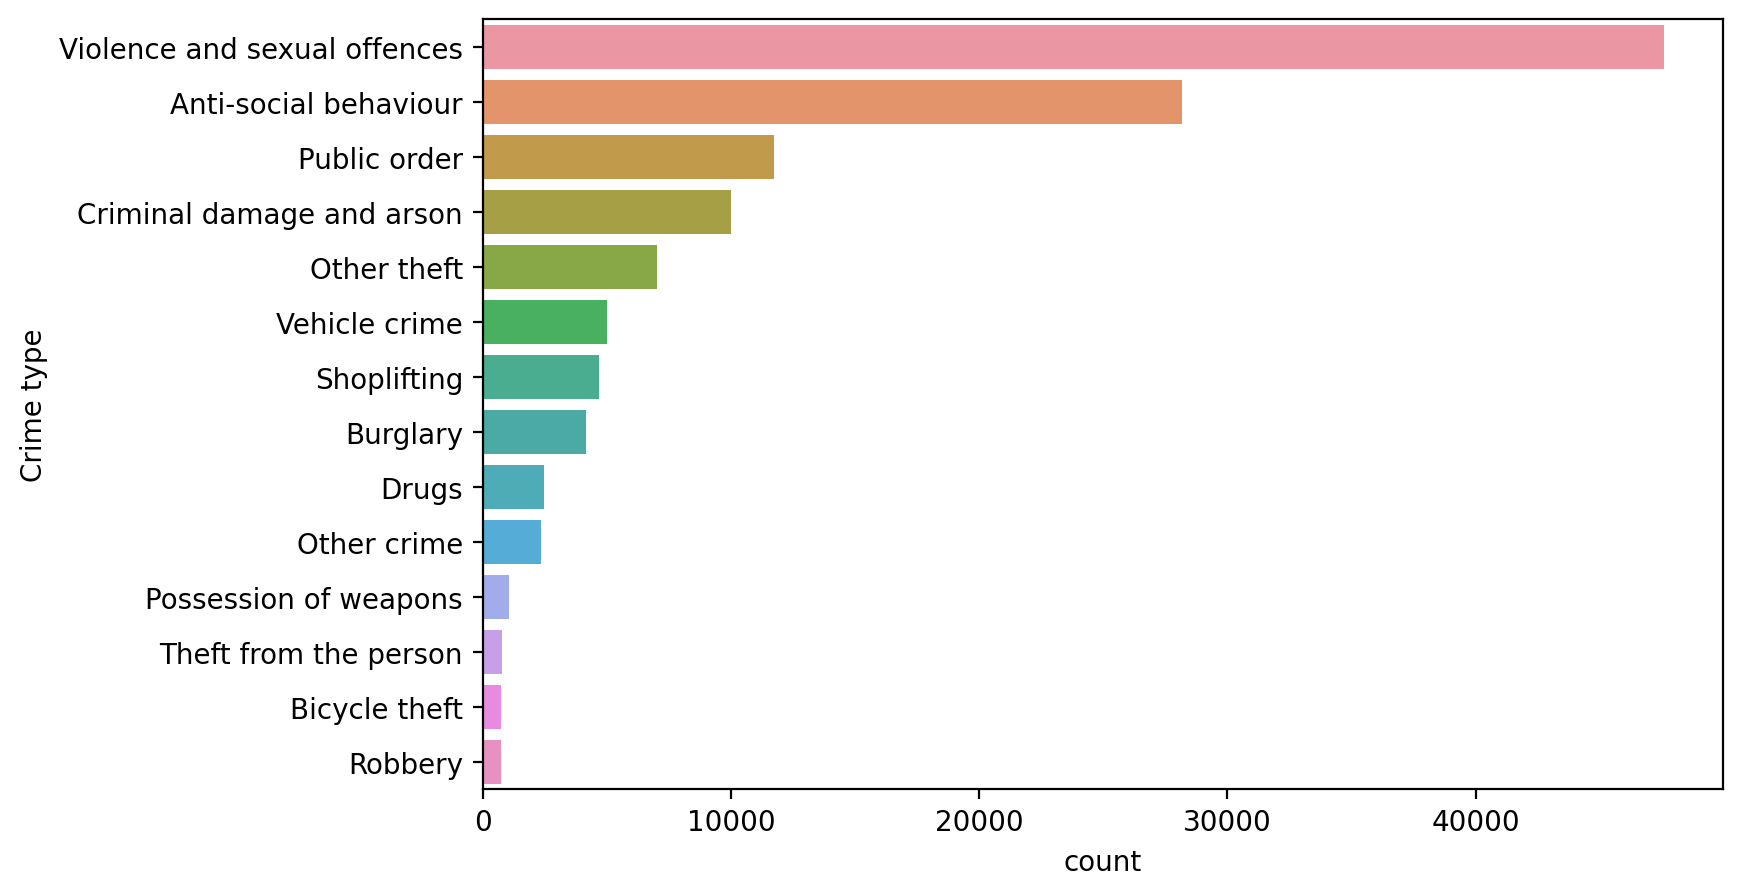

In [383]:
plt.figure(figsize = (8, 5))
sns.countplot(y= 'Crime type', data = derby_df, order = derby_df['Crime type'].value_counts().iloc[:15].index)

<AxesSubplot:xlabel='count', ylabel='Location'>

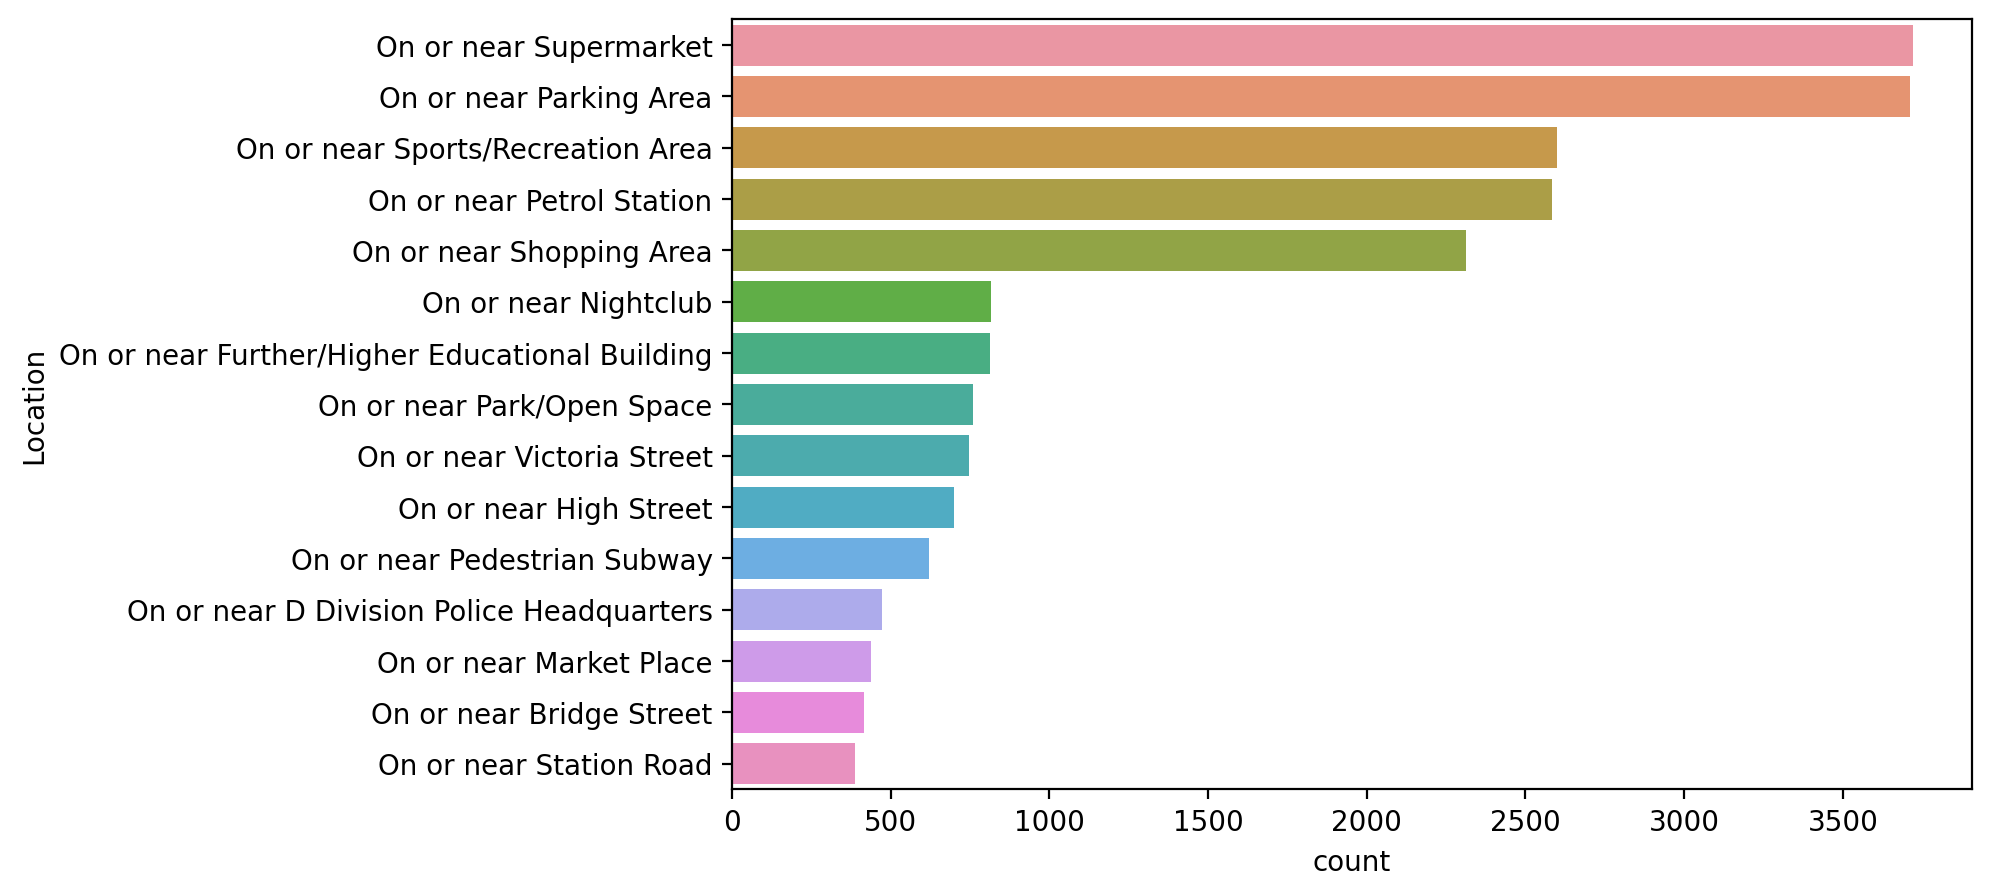

In [384]:
plt.figure(figsize = (8, 5))
sns.countplot(y= 'Location', data = derby_df, order = derby_df['Location'].value_counts().iloc[:15].index)

Text(0, 0.5, 'Number of Crimes')

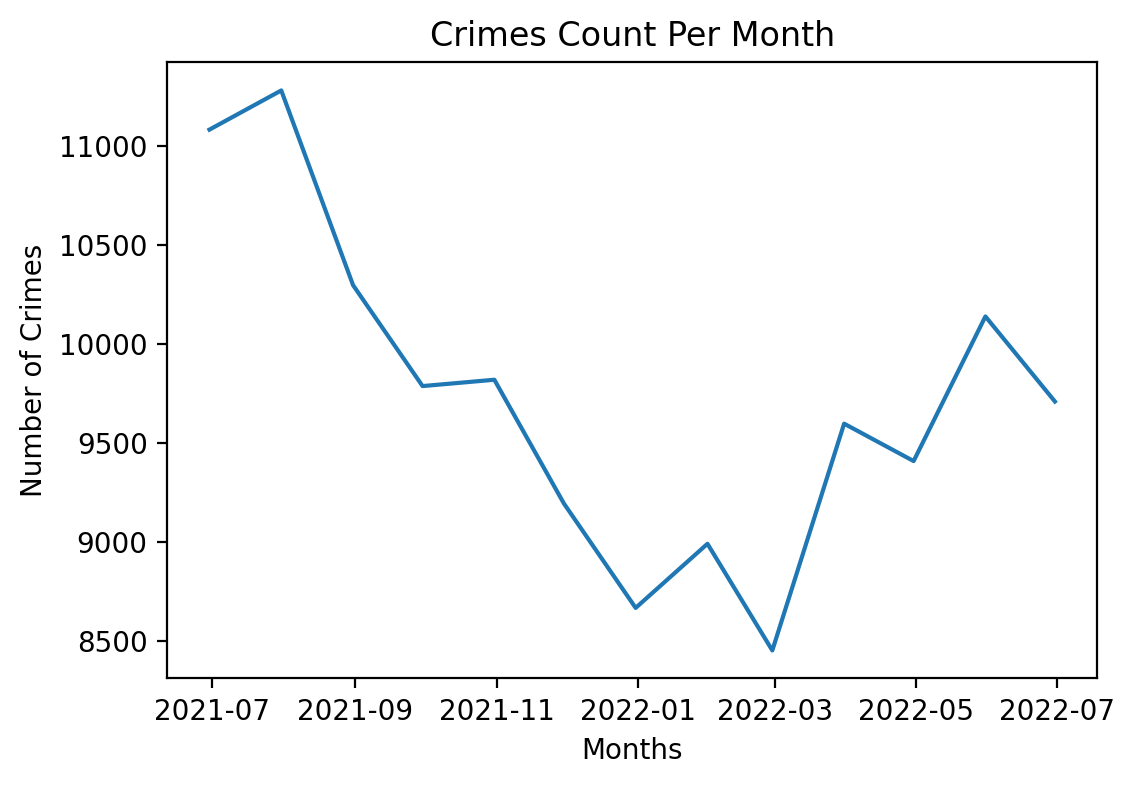

In [358]:
# Resample is a Convenience method for frequency conversion and resampling of time series.
plt.figure(figsize = (6, 4))
plt.plot(derby_df.resample('M').size())

plt.title('Crimes Count Per Month')
plt.xlabel('Months')
plt.ylabel('Number of Crimes')


In [370]:
# Resample is a Convenience method for frequency conversion and resampling of time series.
plt.figure(figsize = (6, 4))
plt.plot(derby_df.resample('Q').size())

plt.title('Crimes Count Per Quarter')
plt.xlabel('Quarters')
plt.ylabel('Number of Crimes')

TypeError: Only valid with DatetimeIndex, TimedeltaIndex or PeriodIndex, but got an instance of 'RangeIndex'

<Figure size 600x400 with 0 Axes>

In [360]:
derby_prophet = derby_df.resample('M').size().reset_index()
derby_prophet.columns = ['Date', 'Crime Count']
derby_prophet_df = pd.DataFrame(derby_prophet)
derby_prophet

Date  Crime Count
0  2021-06-30        11084
1  2021-07-31        11282
2  2021-08-31        10298
3  2021-09-30         9788
4  2021-10-31         9820
5  2021-11-30         9195
6  2021-12-31         8667
7  2022-01-31         8991
8  2022-02-28         8452
9  2022-03-31         9598
10 2022-04-30         9409
11 2022-05-31        10140
12 2022-06-30         9710

<h3>Predictions for cities</h3>

In [361]:
derby_prophet_df_final = derby_prophet_df.rename(columns={'Date':'ds', 'Crime Count':'y'})
derby_prophet_df_final

ds      y
0  2021-06-30  11084
1  2021-07-31  11282
2  2021-08-31  10298
3  2021-09-30   9788
4  2021-10-31   9820
5  2021-11-30   9195
6  2021-12-31   8667
7  2022-01-31   8991
8  2022-02-28   8452
9  2022-03-31   9598
10 2022-04-30   9409
11 2022-05-31  10140
12 2022-06-30   9710

In [362]:
from fbprophet import Prophet

In [363]:
m = Prophet()
m.fit(derby_prophet_df_final)

# Forcasting into the future
future = m.make_future_dataframe(periods=350)
forecast = m.predict(future)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 9.
C:\Users\adity\anaconda3\lib\site-packages\fbprophet\forecaster.py:401: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  .astype(np.int)


<Figure size 300x100 with 0 Axes>

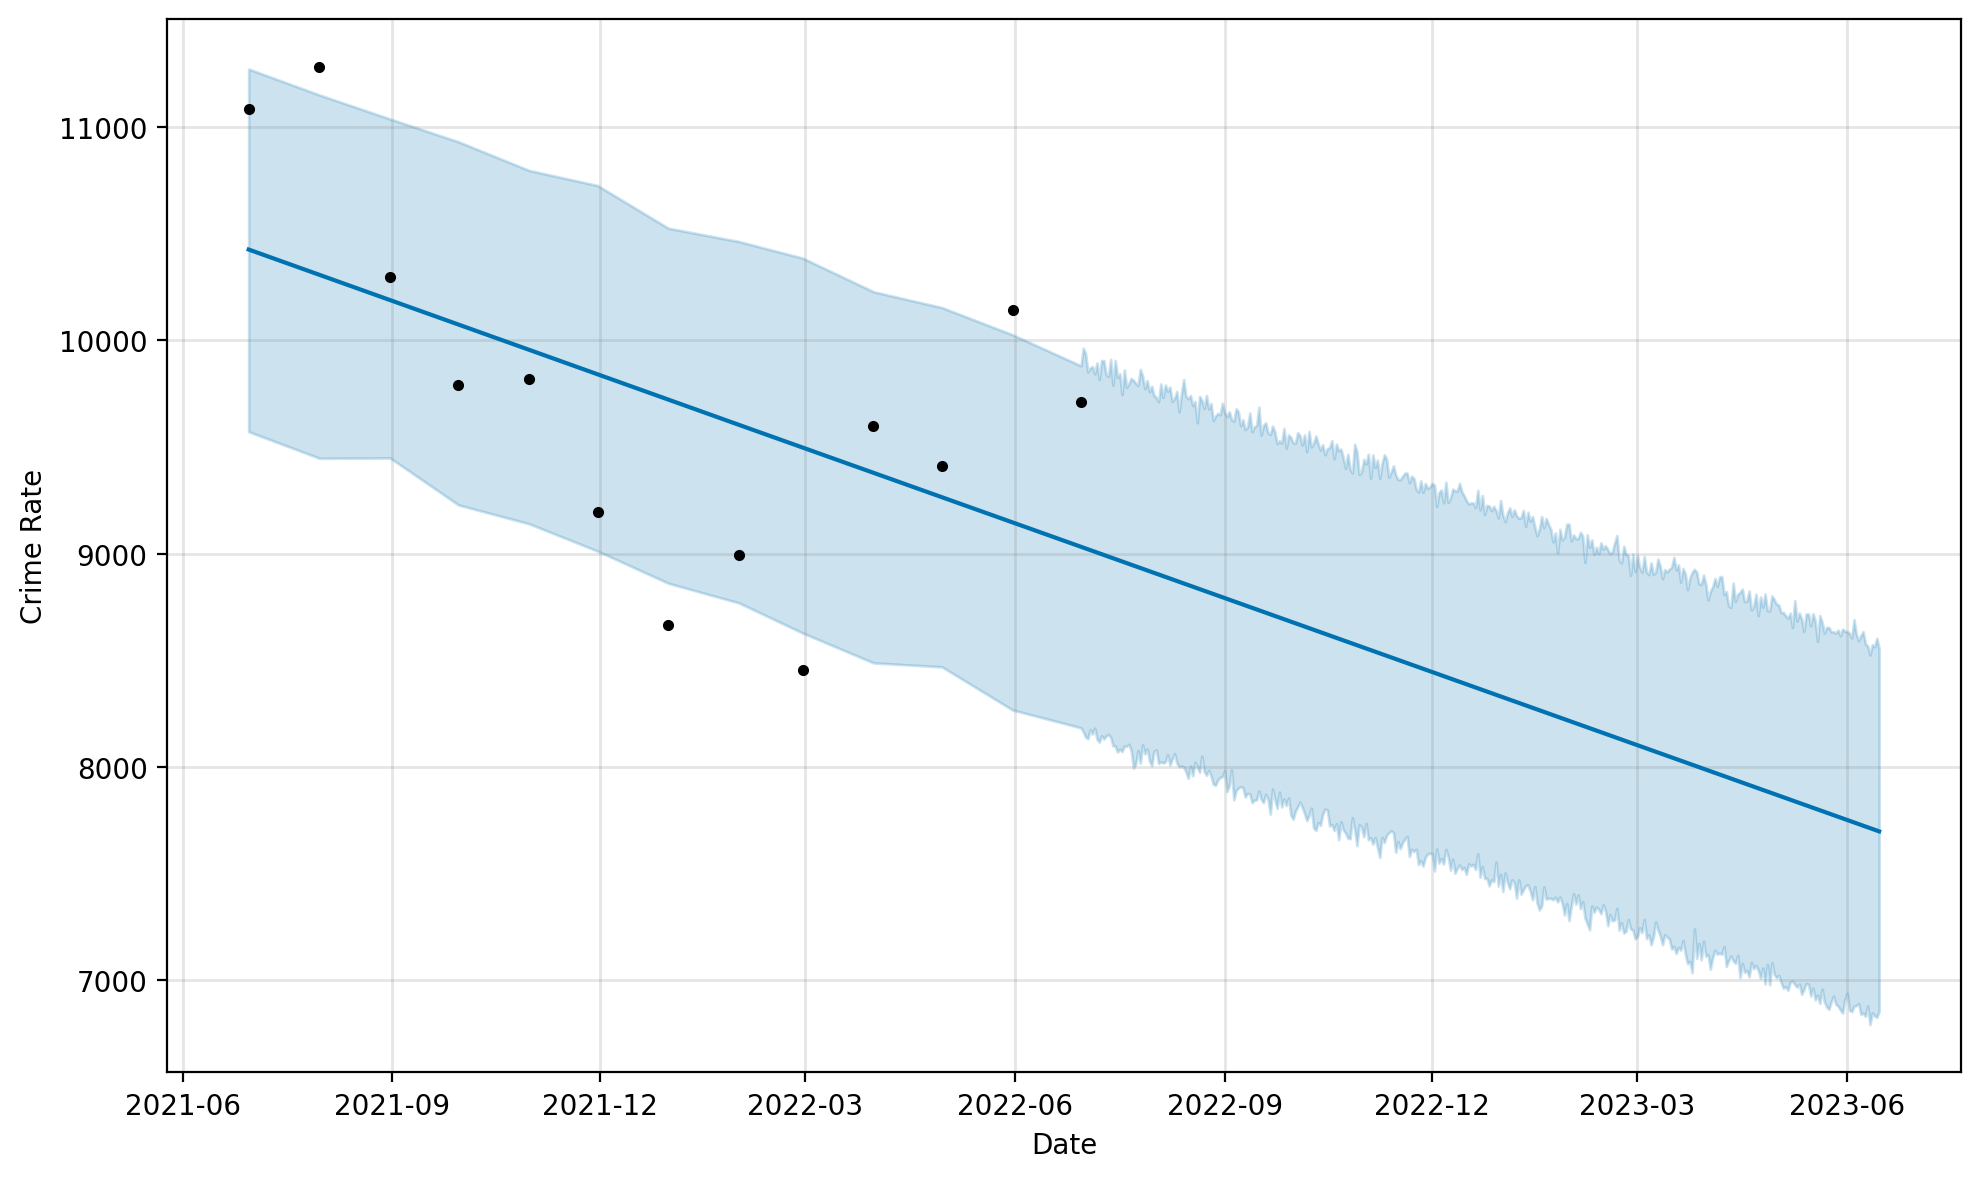

In [364]:
plt.figure(figsize = (3, 1))
figure = m.plot(forecast, xlabel='Date', ylabel='Crime Rate')


In [ ]:
from fbprophet import Prophet

m = Prophet()
m.fit(derby_prophet_df_final)

# Forcasting into the future
future = m.make_future_dataframe(periods=350)
forecast = m.predict(future)

plt.figure(figsize = (3, 1))
figure = m.plot(forecast, xlabel='Date', ylabel='Crime Rate')


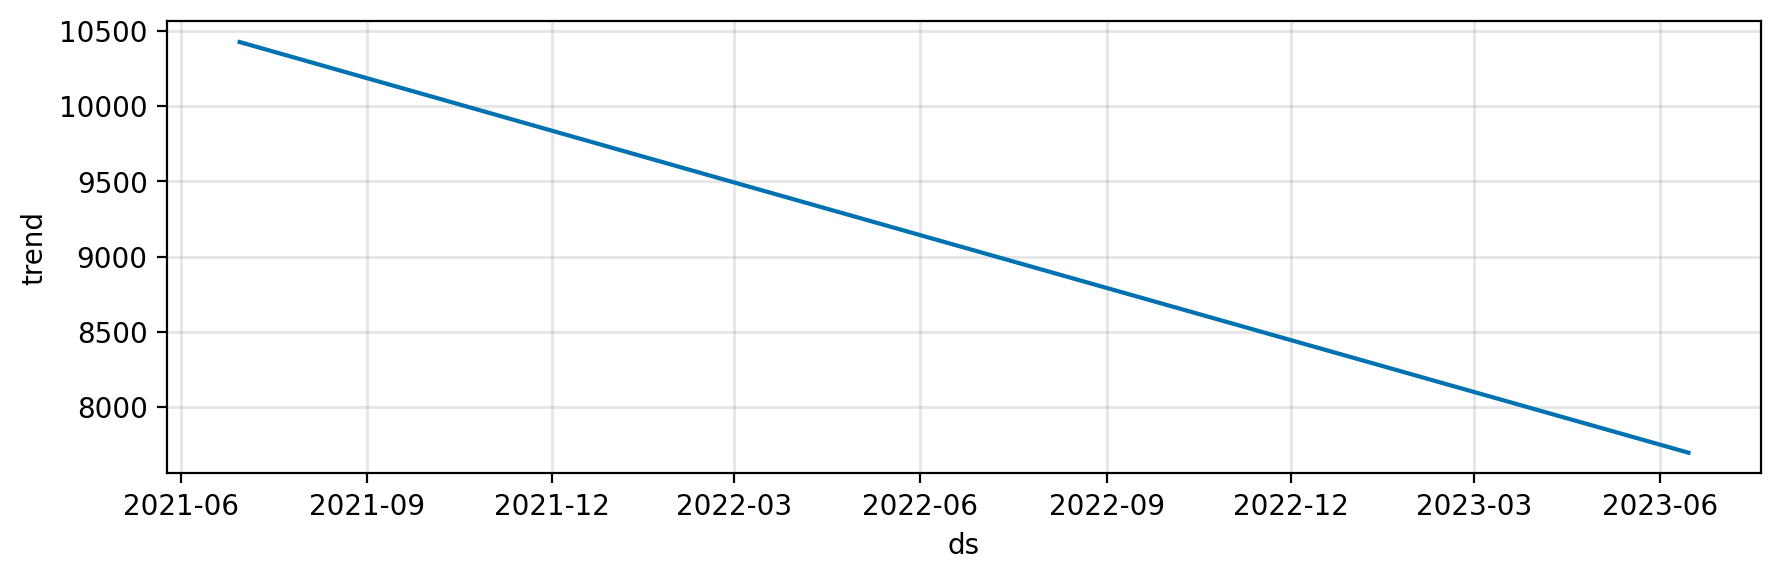

In [285]:
figure3 = m.plot_components(forecast)

In [385]:
Classes = derby_df['Crime type'].unique()
Classes

array(['Anti-social behaviour', 'Public order',
       'Violence and sexual offences', 'Burglary',
       'Criminal damage and arson', 'Shoplifting', 'Vehicle crime',
       'Possession of weapons', 'Other crime', 'Drugs', 'Other theft',
       'Bicycle theft', 'Robbery', 'Theft from the person'], dtype=object)

In [386]:
# Splitting the Date to Day, Month, Year, Hour, Minute, Second
derby_df['Months'] = pd.to_datetime(derby_df['Month'])

derby_df['Months'] = derby_df['Months'].dt.month
#derby_df['Days'] = derby_df['Months'].dt.month
#derby_df['Day'] = derby_df['Month'].dt.day
#derby_df['Hour'] = derby_df['Month'].dt.hour
#derby_df['Minute'] = derby_df['Month'].dt.minute
#derby_df['Second'] = derby_df['Month'].dt.second 
derby_df = derby_df.drop(['Month'], axis=1) 

derby_df.head()

Crime ID  Longitude   Latitude  \
0                                                NaN  -1.376412  53.098677   
1                                                NaN  -1.373260  53.100835   
2                                                NaN  -1.376752  53.101034   
3                                                NaN  -1.376752  53.101034   
4  376695a32d3b1461123fac622438e2153f843354fd4b6b...  -1.377638  53.098647   

                    Location          LSOA name             Crime type  \
0  On or near Mansfield Road  Amber Valley 001A  Anti-social behaviour   
1   On or near Salcombe Road  Amber Valley 001A  Anti-social behaviour   
2     On or near Meadow Lane  Amber Valley 001A  Anti-social behaviour   
3     On or near Meadow Lane  Amber Valley 001A  Anti-social behaviour   
4  On or near Mansfield Road  Amber Valley 001A           Public order   

         Last outcome category  Months  
0                          NaN       6  
1                          NaN       6  
2                          NaN       6  
3                          NaN       6  
4  Unable to prosecute suspect       6

In [387]:
# Convert Categorical Attributes to Numerical
#derby_df['Reported by'] = pd.factorize(derby_df["Reported by"])[0]
#derby_df['Falls within'] = pd.factorize(derby_df["Falls within"])[0]
#derby_df['LSOA code'] = pd.factorize(derby_df["LSOA code"])[0]
derby_df['Crime ID'] = pd.factorize(derby_df["Crime ID"])[0]
derby_df['Location'] = pd.factorize(derby_df["Location"])[0]
derby_df['LSOA name'] = pd.factorize(derby_df["LSOA name"])[0]
derby_df['Last outcome category'] = pd.factorize(derby_df["Last outcome category"])[0] 

In [388]:
#Encode target labels into categorical variables:
derby_df['Crime type'] = pd.factorize(derby_df["Crime type"])[0] 
derby_df['Crime type'].unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13],
      dtype=int64)

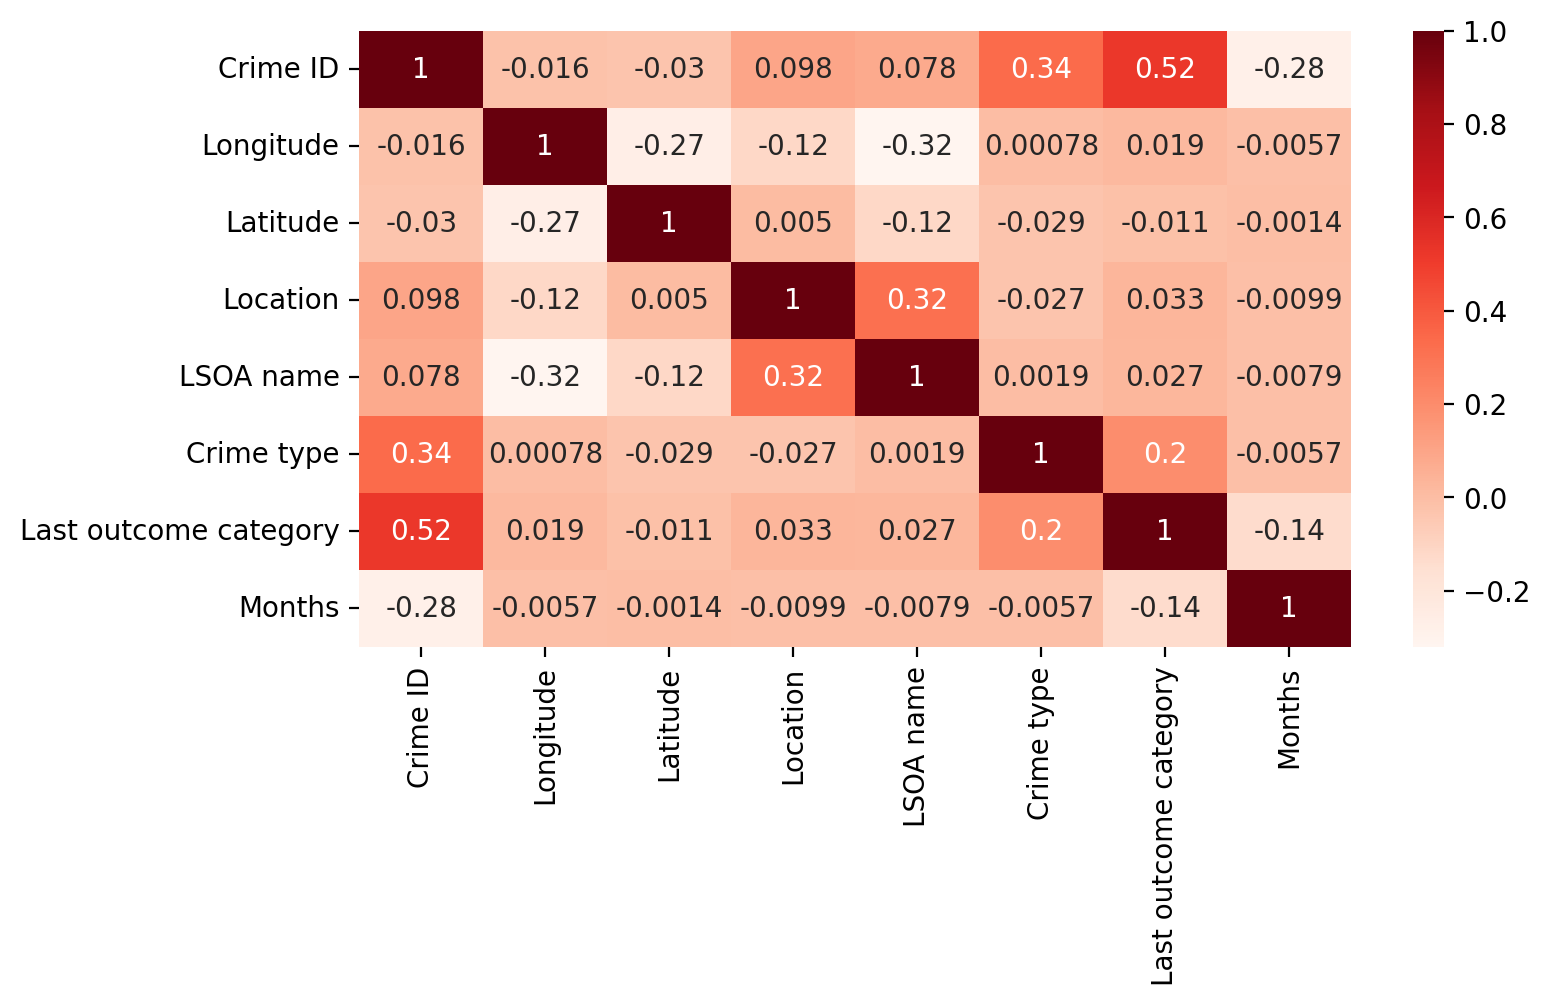

In [389]:
# Feature Selection using Filter Method 
# Split Dataframe to target class and features
X_fs = derby_df.drop(['Crime type'], axis=1)
Y_fs = derby_df['Crime type']

#Using Pearson Correlation
plt.figure(figsize=(8,4))
cor = derby_df.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

In [390]:
#Correlation with output variable
cor_target = abs(cor['Crime type'])
#Selecting highly correlated features
relevant_features = cor_target[cor_target>0.2]
relevant_features

Crime ID      0.335931
Crime type    1.000000
Name: Crime type, dtype: float64

In [397]:
# At Current Point, the attributes is select manually based on Feature Selection Part. 
Features = ["Crime ID","Location"]
print('Full Features: ', Features)

Target = 'Crime type'
print('Target: ', Target)

Full Features:  ['Crime ID', 'Location']
Target:  Crime type


In [398]:
#Split dataset to Training Set & Test Set
x, y = train_test_split(derby_df, 
                        test_size = 0.2, 
                        train_size = 0.8, 
                        random_state= 3)

x1 = x[Features]    #Features to train
x2 = x[Target]      #Target Class to train
y1 = y[Features]    #Features to test
y2 = y[Target]      #Target Class to test

print('Feature Set Used    : ', Features)
print('Target Class        : ', Target)
print('Training Set Size   : ', x.shape)
print('Test Set Size       : ', y.shape)

Feature Set Used    :  ['Crime ID', 'Location']
Target Class        :  Crime type
Training Set Size   :  (101147, 8)
Test Set Size       :  (25287, 8)


In [399]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, confusion_matrix, classification_report, accuracy_score, f1_score

# ML Libraries
from sklearn.ensemble import RandomForestClassifier,VotingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier

# Evaluation Metrics
#from yellowbrick.classifier import ClassificationReport
from sklearn import metrics

In [400]:
# Random Forest
# Create Model with configuration
rf_model = RandomForestClassifier(n_estimators=70, # Number of trees
                                  min_samples_split = 30,
                                  bootstrap = True, 
                                  max_depth = 50, 
                                  min_samples_leaf = 25)

# Model Training
rf_model.fit(X=x1,
             y=x2)

# Prediction
result = rf_model.predict(y[Features])

C:\Users\adity\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:569: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y_store_unique_indices = np.zeros(y.shape, dtype=np.int)
C:\Users\adity\anaconda3\lib\site-packages\sklearn\tree\_classes.py:190: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your

In [401]:
# Model Evaluation
ac_sc = accuracy_score(y2, result)
rc_sc = recall_score(y2, result, average="weighted")
pr_sc = precision_score(y2, result, average="weighted")
f1_sc = f1_score(y2, result, average='micro')
confusion_m = confusion_matrix(y2, result)

print("========== Random Forest Results ==========")
print("Accuracy    : ", ac_sc)
print("Recall      : ", rc_sc)
print("Precision   : ", pr_sc)
print("F1 Score    : ", f1_sc)
print("Confusion Matrix: ")
print(confusion_m)

========== Random Forest Results ==========
Accuracy    :  0.6086131213667102
Recall      :  0.6086131213667102
Precision   :  0.5405684232902058
F1 Score    :  0.6086131213667102
Confusion Matrix: 
[[5663    0    0    0    0    0    0    0    0    0    0    0    0    0]
 [   0   25 2099    0    0  113    0    0    0    5   31    0    0    0]
 [   0    4 9214    0    1  152    5    0    0    5   63    0    0    0]
 [   0    4  836    0    2   39    0    0    0    0   11    0    0    0]
 [   0   11 1918    0   14   44    0    0    0    3   17    0    0    0]
 [   0   13  470    0    0  386    0    0    0    0   40    0    0    0]
 [   0    1 1011    0    0   17    1    0    0    1   24    0    0    0]
 [   0    4  204    0    0   14    0    0    0    0    2    0    0    0]
 [   0    1  465    0    0    6    0    0    0    1    4    0    0    0]
 [   0   11  464    0    0   14    0    0    0    7   10    0    0    0]
 [   0   13 1221    0    1   82    0    0    0    0   80    0    0    0

C:\Users\adity\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [402]:
# Neural Network
# Create Model with configuration 
nn_model = MLPClassifier(solver='adam', 
                         alpha=1e-5,
                         hidden_layer_sizes=(40,), 
                         random_state=1,
                         max_iter=1000                         
                        )

# Model Training
nn_model.fit(X=x1,
             y=x2)

# Prediction
result = nn_model.predict(y[Features]) 
# Model Evaluation
ac_sc = accuracy_score(y2, result)
rc_sc = recall_score(y2, result, average="weighted")
pr_sc = precision_score(y2, result, average="weighted")
f1_sc = f1_score(y2, result, average='micro')
confusion_m = confusion_matrix(y2, result)

print("========== Neural Network Results ==========")
print("Accuracy    : ", ac_sc)
print("Recall      : ", rc_sc)
print("Precision   : ", pr_sc)
print("F1 Score    : ", f1_sc)
print("Confusion Matrix: ")
print(confusion_m)

========== Neural Network Results ==========
Accuracy    :  0.5974611460434215
Recall      :  0.5974611460434215
Precision   :  0.49357901485110844
F1 Score    :  0.5974611460434215
Confusion Matrix: 
[[5663    0    0    0    0    0    0    0    0    0    0    0    0    0]
 [   0    1 2272    0    0    0    0    0    0    0    0    0    0    0]
 [   0    0 9444    0    0    0    0    0    0    0    0    0    0    0]
 [   0    0  892    0    0    0    0    0    0    0    0    0    0    0]
 [   0    0 2007    0    0    0    0    0    0    0    0    0    0    0]
 [   0    0  909    0    0    0    0    0    0    0    0    0    0    0]
 [   0    0 1055    0    0    0    0    0    0    0    0    0    0    0]
 [   0    0  224    0    0    0    0    0    0    0    0    0    0    0]
 [   0    0  477    0    0    0    0    0    0    0    0    0    0    0]
 [   0    0  506    0    0    0    0    0    0    0    0    0    0    0]
 [   0    0 1397    0    0    0    0    0    0    0    0    0    0   

C:\Users\adity\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [243]:
merseyside_df.drop(['Reported by', 'Longitude', 'Latitude', 'Falls within', 'LSOA code', 'LSOA name','Context'], inplace=True, axis=1)

In [244]:
merseyside_df.index = pd.DatetimeIndex(merseyside_df.Month)

In [245]:
merseyside_df['Crime type'].value_counts()

Violence and sexual offences    74305
Public order                    25683
Anti-social behaviour           20209
Criminal damage and arson       16025
Drugs                           11789
Other theft                      9024
Vehicle crime                    7256
Shoplifting                      6952
Burglary                         6853
Other crime                      3417
Theft from the person            2611
Bicycle theft                    1817
Robbery                          1331
Possession of weapons            1299
Name: Crime type, dtype: int64

<AxesSubplot:xlabel='count', ylabel='Crime type'>

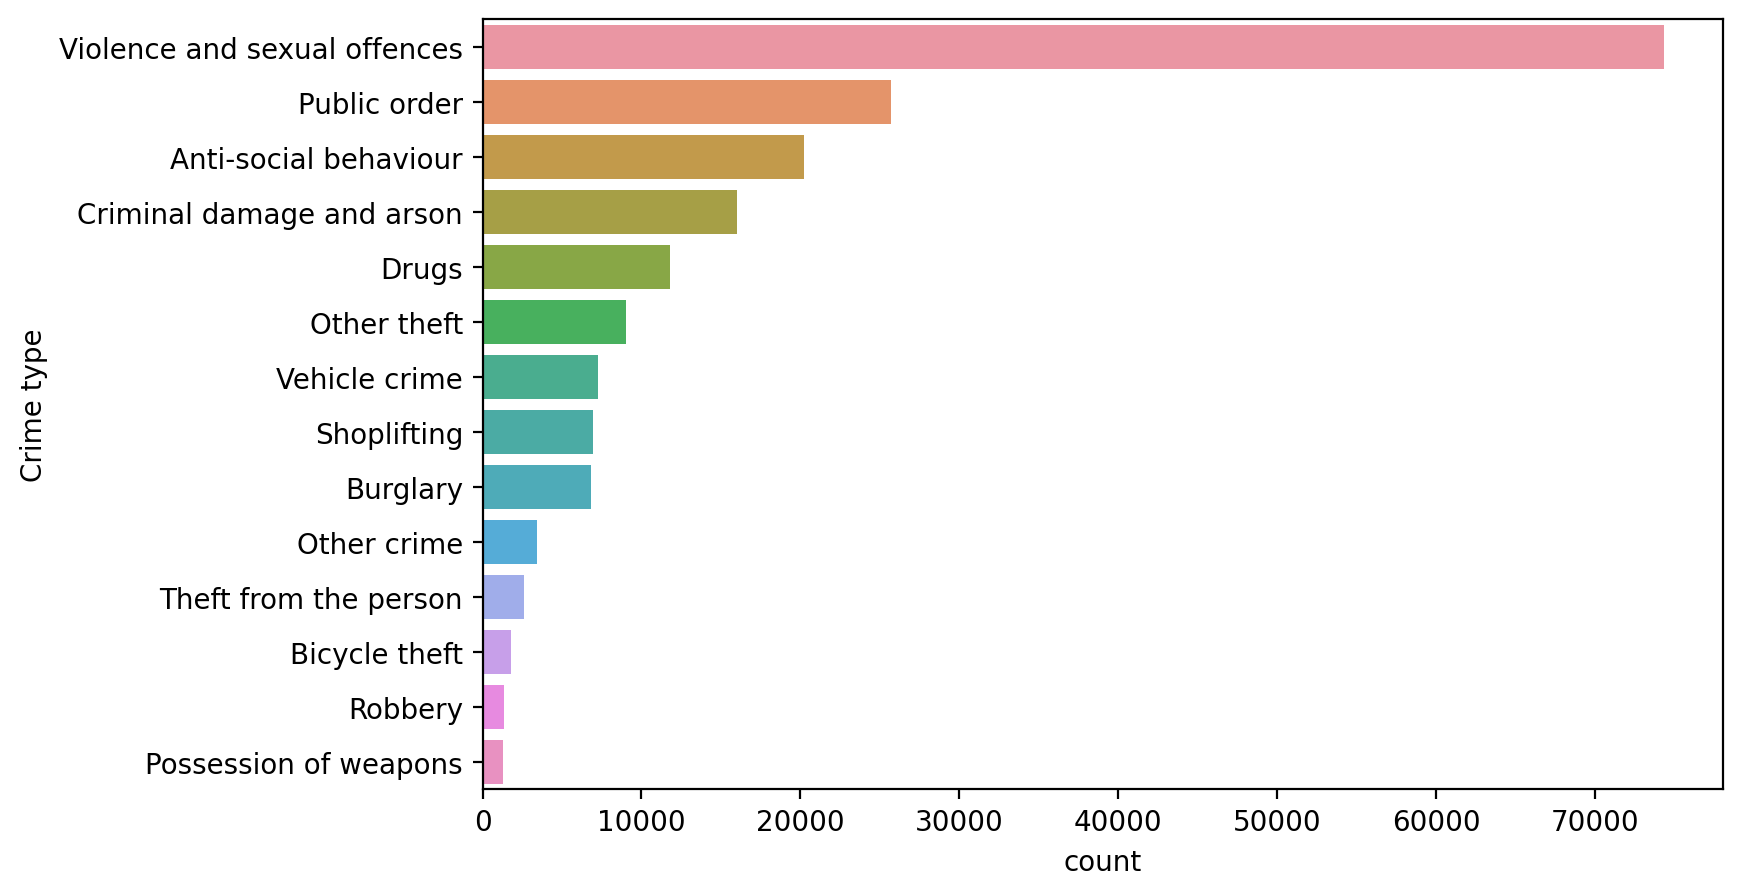

In [246]:
plt.figure(figsize = (8, 5))
sns.countplot(y= 'Crime type', data = merseyside_df, order = merseyside_df['Crime type'].value_counts().iloc[:15].index)

<AxesSubplot:xlabel='count', ylabel='Location'>

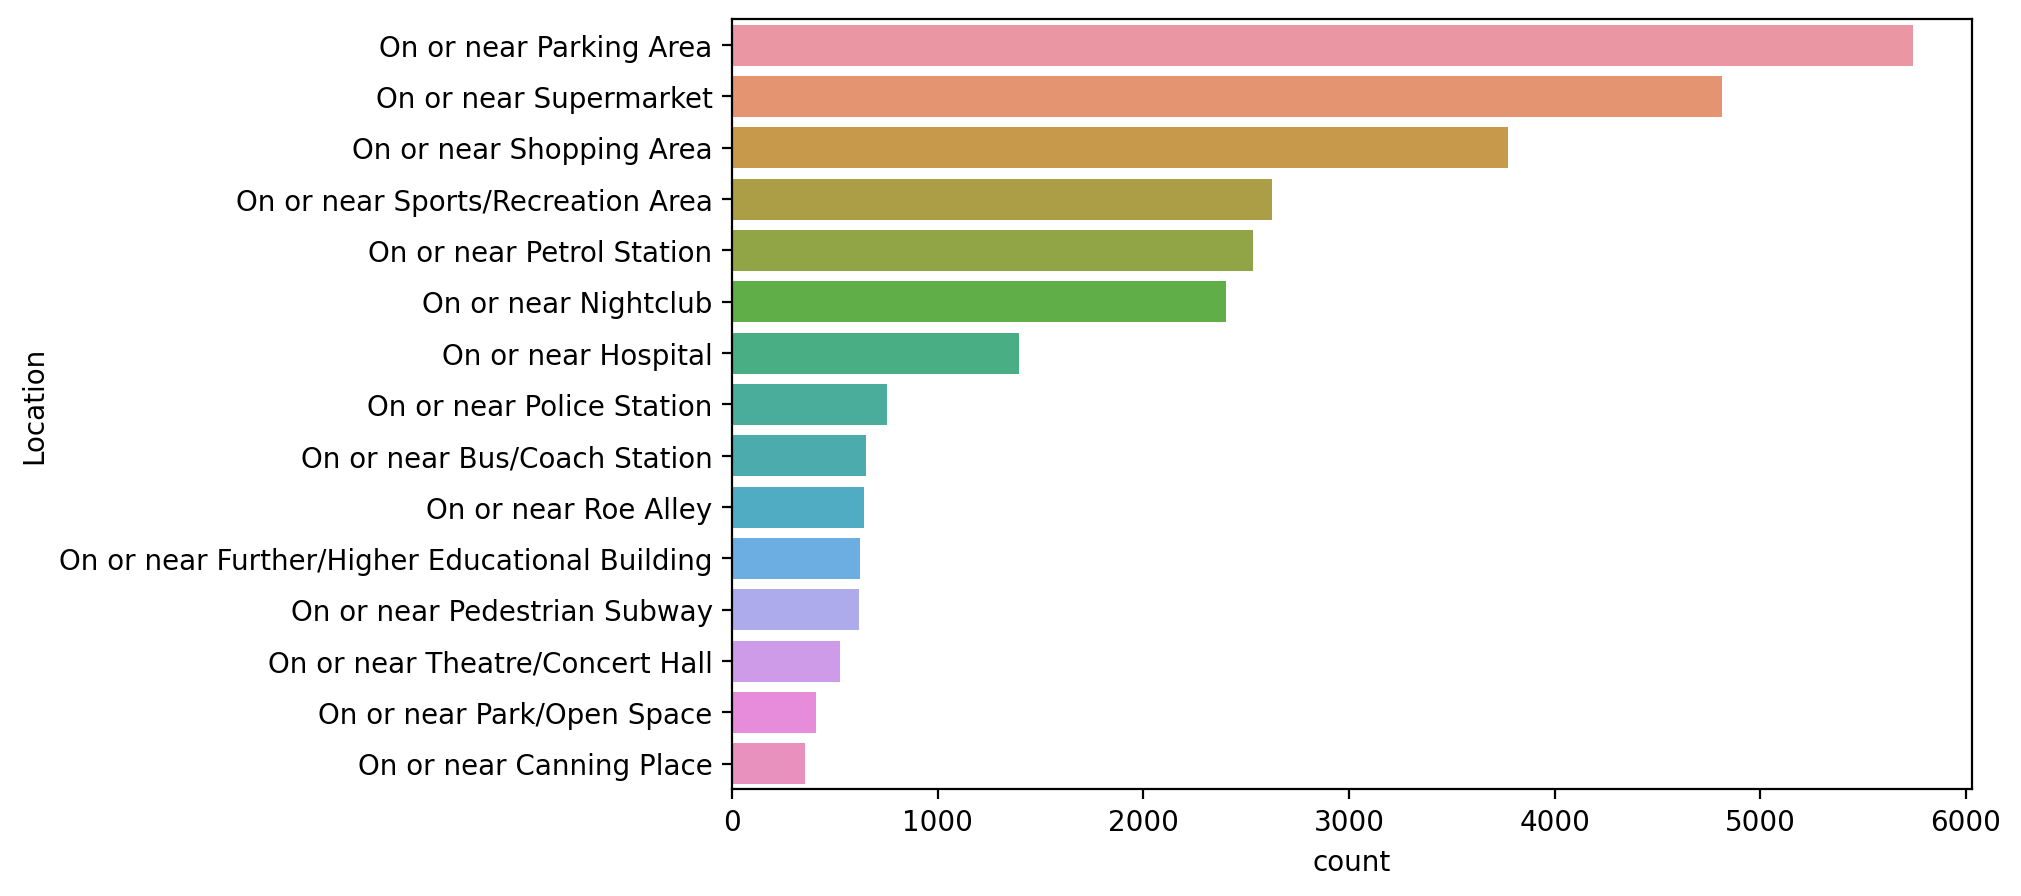

In [247]:
plt.figure(figsize = (8, 5))
sns.countplot(y= 'Location', data = merseyside_df, order = merseyside_df['Location'].value_counts().iloc[:15].index)

Text(0, 0.5, 'Number of Crimes')

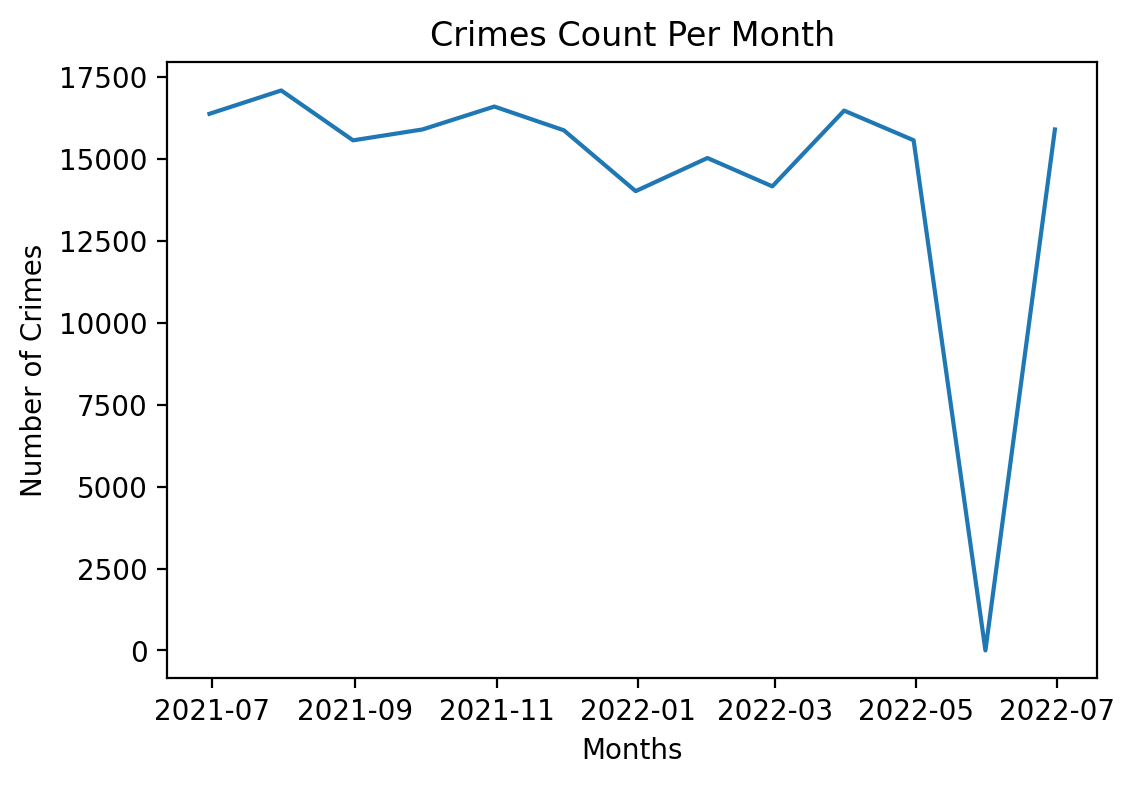

In [248]:
# Resample is a Convenience method for frequency conversion and resampling of time series.
plt.figure(figsize = (6, 4))
plt.plot(merseyside_df.resample('M').size())

plt.title('Crimes Count Per Month')
plt.xlabel('Months')
plt.ylabel('Number of Crimes')


Text(0, 0.5, 'Number of Crimes')

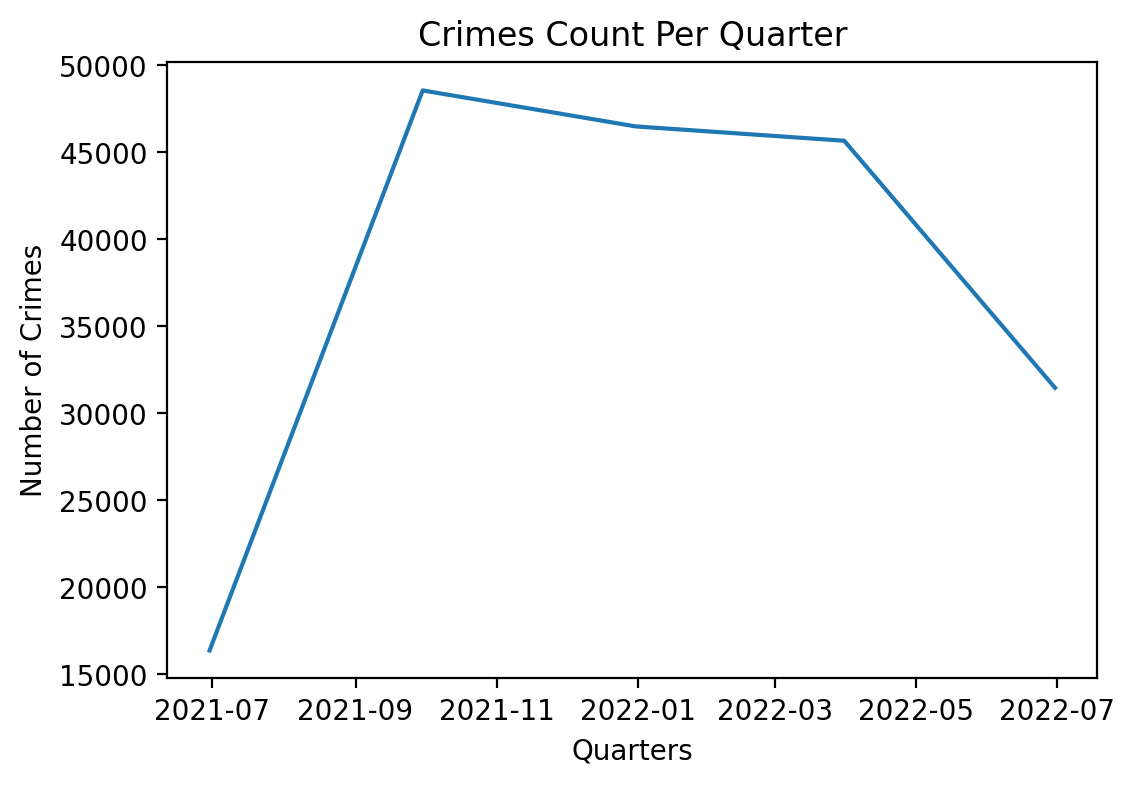

In [250]:
# Resample is a Convenience method for frequency conversion and resampling of time series.
plt.figure(figsize = (6, 4))
plt.plot(merseyside_df.resample('Q').size())

plt.title('Crimes Count Per Quarter')
plt.xlabel('Quarters')
plt.ylabel('Number of Crimes')

In [251]:
merseyside_prophet = merseyside_df.resample('M').size().reset_index()
merseyside_prophet.columns = ['Date', 'Crime Count']
merseyside_prophet_df = pd.DataFrame(merseyside_prophet)
merseyside_prophet

Date  Crime Count
0  2021-06-30        16378
1  2021-07-31        17091
2  2021-08-31        15568
3  2021-09-30        15901
4  2021-10-31        16600
5  2021-11-30        15875
6  2021-12-31        14018
7  2022-01-31        15029
8  2022-02-28        14164
9  2022-03-31        16476
10 2022-04-30        15571
11 2022-05-31            0
12 2022-06-30        15900

<h3>Predictions for cities</h3>

In [252]:
merseyside_prophet_df_final = merseyside_prophet_df.rename(columns={'Date':'ds', 'Crime Count':'y'})
merseyside_prophet_df_final

ds      y
0  2021-06-30  16378
1  2021-07-31  17091
2  2021-08-31  15568
3  2021-09-30  15901
4  2021-10-31  16600
5  2021-11-30  15875
6  2021-12-31  14018
7  2022-01-31  15029
8  2022-02-28  14164
9  2022-03-31  16476
10 2022-04-30  15571
11 2022-05-31      0
12 2022-06-30  15900

In [253]:
from fbprophet import Prophet

In [256]:
m_1 = Prophet()
m_1.fit(merseyside_prophet_df_final)

# Forcasting into the future
future = m_1.make_future_dataframe(periods=350)
forecast = m_1.predict(future)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 9.
C:\Users\adity\anaconda3\lib\site-packages\fbprophet\forecaster.py:401: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  .astype(np.int)


<Figure size 300x100 with 0 Axes>

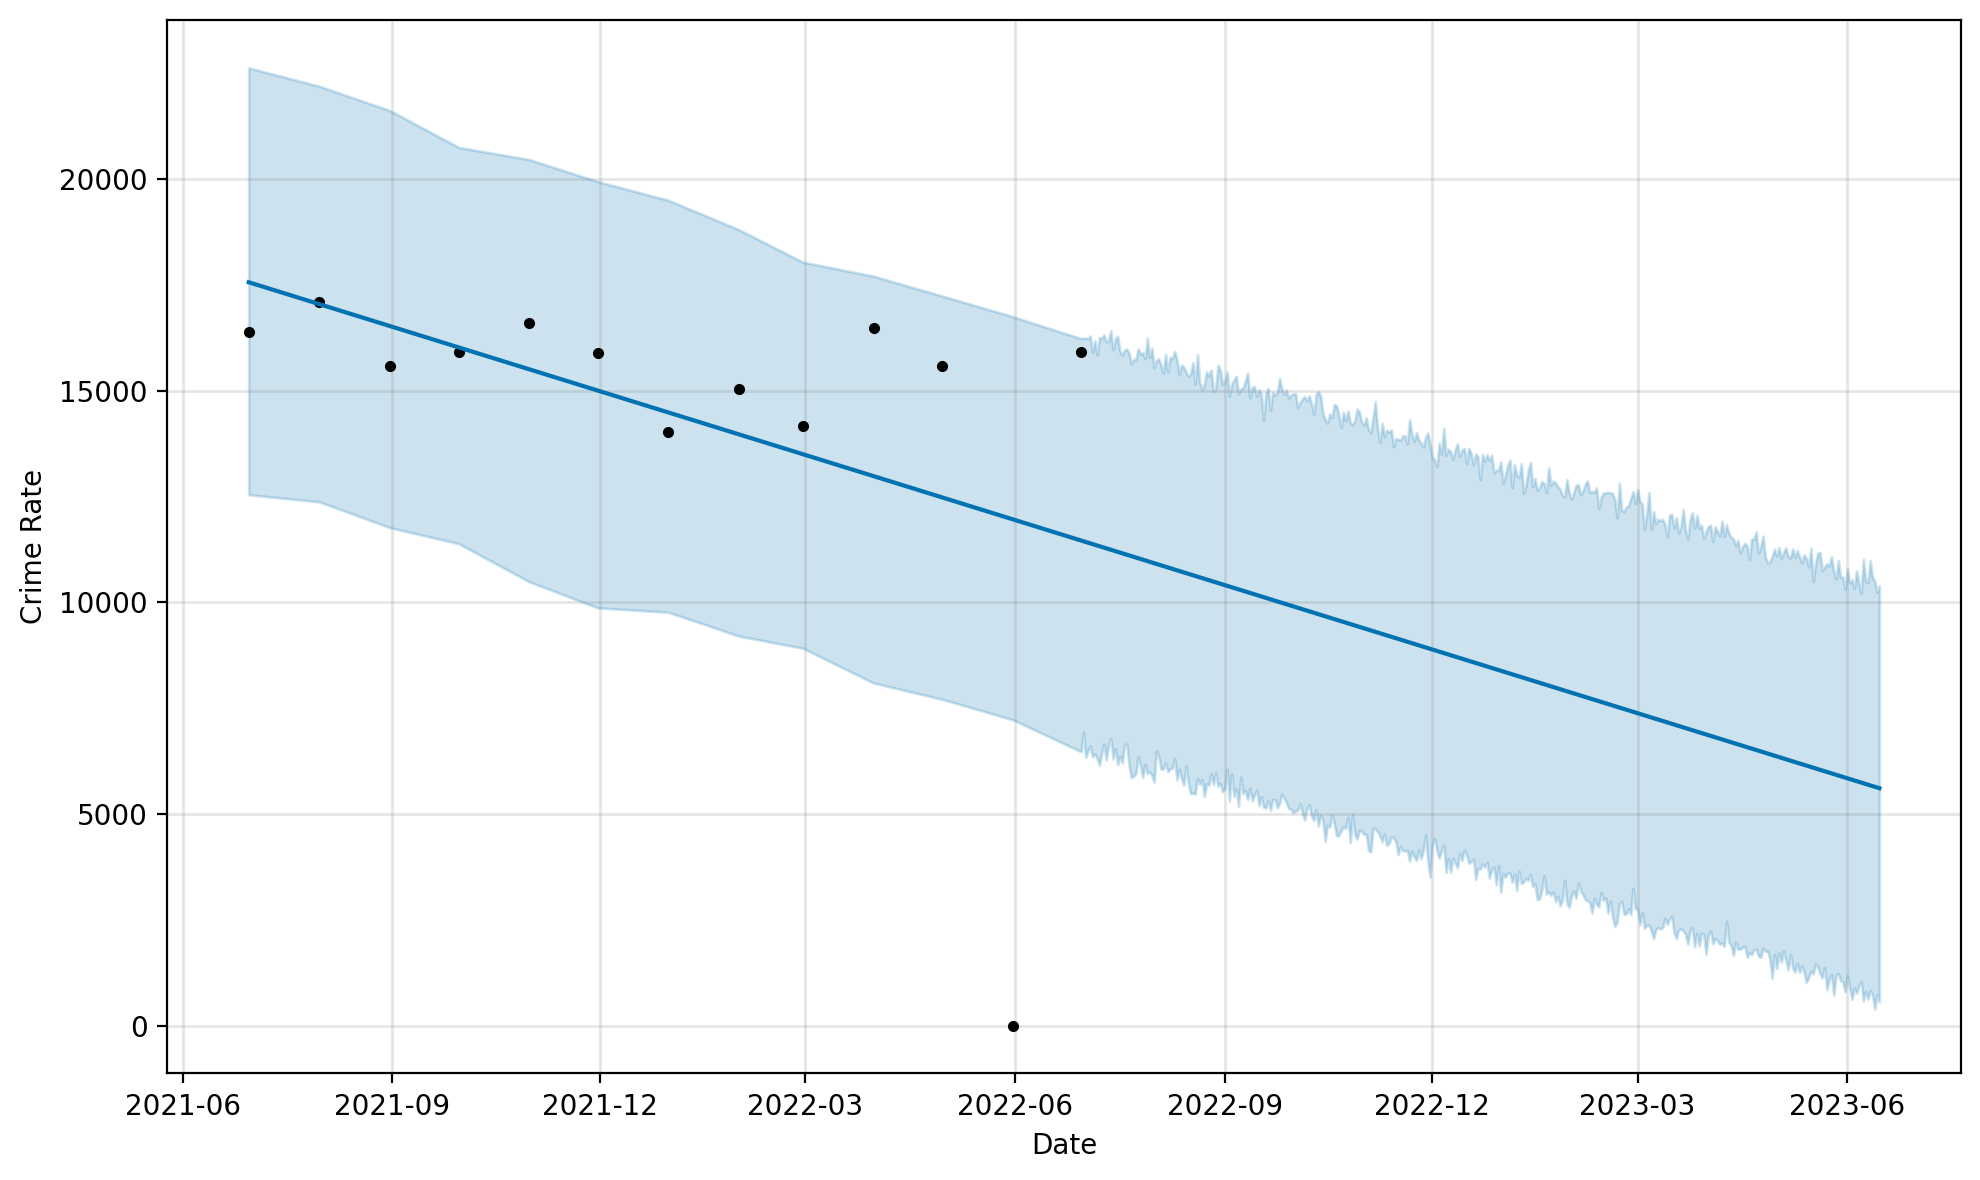

In [257]:
plt.figure(figsize = (3, 1))
figure = m_1.plot(forecast, xlabel='Date', ylabel='Crime Rate')


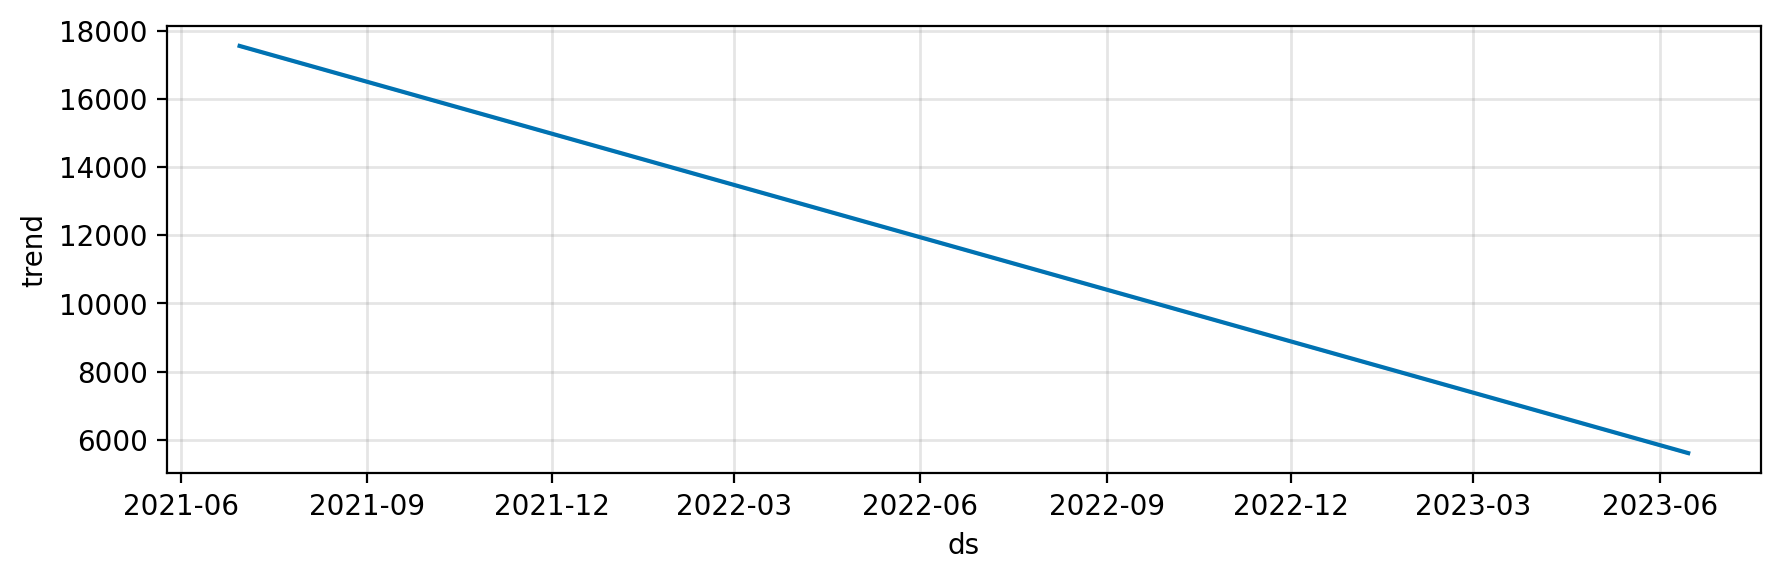

In [258]:
figure3 = m_1.plot_components(forecast)

In [18]:
overall_city_crime_df=pd.concat([derby_df,merseyside_df,london_df,sussex_df,essex_df,leicestershire_df])

In [19]:
overall_city_crime_df

Crime ID    Month  \
0                                                     NaN  2021-06   
1                                                     NaN  2021-06   
2                                                     NaN  2021-06   
3                                                     NaN  2021-06   
4       376695a32d3b1461123fac622438e2153f843354fd4b6b...  2021-06   
...                                                   ...      ...   
118006  037889d0c065a85f61389016511b0b7473c48166ded228...  2022-06   
118007  ec34694649d33e5e211c590c3388b0fbdc7f079d7bacf1...  2022-06   
118008  6a7fe7a1458ce128d97378a49e94b5b98a032977721d2b...  2022-06   
118009  97f007945164b1e02f53381e965830db54f7e54b118340...  2022-06   
118010  5f555b72010344b8d850871d10be848c64a8ccb8b9b110...  2022-06   

                    Reported by             Falls within  Longitude  \
0       Derbyshire Constabulary  Derbyshire Constabulary  -1.376412   
1       Derbyshire Constabulary  Derbyshire Constabulary  -1.373260   
2       Derbyshire Constabulary  Derbyshire Constabulary  -1.376752   
3       Derbyshire Constabulary  Derbyshire Constabulary  -1.376752   
4       Derbyshire Constabulary  Derbyshire Constabulary  -1.377638   
...                         ...                      ...        ...   
118006    Leicestershire Police    Leicestershire Police        NaN   
118007    Leicestershire Police    Leicestershire Police        NaN   
118008    Leicestershire Police    Leicestershire Police        NaN   
118009    Leicestershire Police    Leicestershire Police        NaN   
118010    Leicestershire Police    Leicestershire Police        NaN   

         Latitude                   Location  LSOA code          LSOA name  \
0       53.098677  On or near Mansfield Road  E01019400  Amber Valley 001A   
1       53.100835   On or near Salcombe Road  E01019400  Amber Valley 001A   
2       53.101034     On or near Meadow Lane  E01019400  Amber Valley 001A   
3       53.101034     On or near Meadow Lane  E01019400  Amber Valley 001A   
4       53.098647  On or near Mansfield Road  E01019400  Amber Valley 001A   
...           ...                        ...        ...                ...   
118006        NaN                No Location        NaN                NaN   
118007        NaN                No Location        NaN                NaN   
118008        NaN                No Location        NaN                NaN   
118009        NaN                No Location        NaN                NaN   
118010        NaN                No Location        NaN                NaN   

                   Crime type        Last outcome category  Context  
0       Anti-social behaviour                          NaN      NaN  
1       Anti-social behaviour                          NaN      NaN  
2       Anti-social behaviour                          NaN      NaN  
3       Anti-social behaviour                          NaN      NaN  
4                Public order  Unable to prosecute suspect      NaN  
...                       ...                          ...      ...  
118006            Other crime          Under investigation      NaN  
118007            Other crime          Under investigation      NaN  
118008            Other crime          Under investigation      NaN  
118009            Other crime          Under investigation      NaN  
118010            Other crime          Under investigation      NaN  

[814936 rows x 12 columns]

In [17]:
overall_city_crime_df['Crime type'].unique()

array(['Anti-social behaviour', 'Public order',
       'Violence and sexual offences', 'Burglary',
       'Criminal damage and arson', 'Shoplifting', 'Vehicle crime',
       'Possession of weapons', 'Other crime', 'Drugs', 'Other theft',
       'Bicycle theft', 'Robbery', 'Theft from the person'], dtype=object)

In [71]:
sep_df_sexual=overall_city_crime_df[overall_city_crime_df['Crime type']=='Violence and sexual offences']

In [72]:
sep_df_public=overall_city_crime_df[overall_city_crime_df['Crime type']=='Public order']

In [73]:
sep_df_antisocial=overall_city_crime_df[overall_city_crime_df['Crime type']=='Anti-social behaviour']

In [74]:
sep_df_criminal_damage=overall_city_crime_df[overall_city_crime_df['Crime type']=='Criminal damage and arson']

In [75]:
#sep_df_sexual['LSOA name'].value_counts()

<h3>Crime wise top Locations for Top four crime types - sexual, public order, criminal damage and antisocial</h3>

<AxesSubplot:xlabel='count', ylabel='LSOA name'>

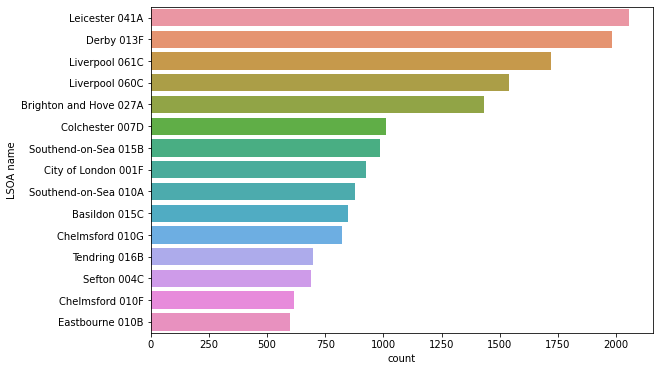

In [70]:
plt.figure(figsize = (9, 6))
sns.countplot(y= 'LSOA name', data = sep_df_sexual, order = sep_df_sexual['LSOA name'].value_counts().iloc[:15].index)

<AxesSubplot:xlabel='count', ylabel='LSOA name'>

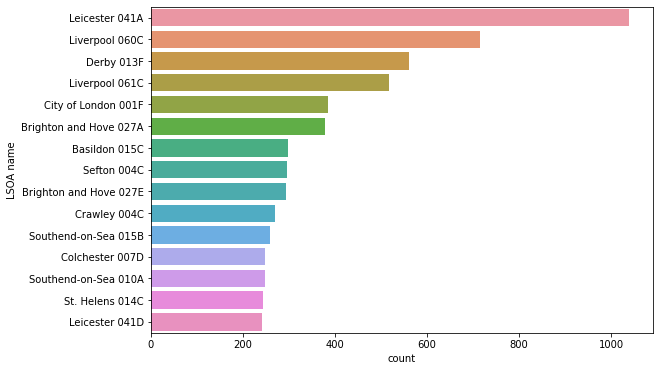

In [76]:
plt.figure(figsize = (9, 6))
sns.countplot(y= 'LSOA name', data = sep_df_public, order = sep_df_public['LSOA name'].value_counts().iloc[:15].index)

<AxesSubplot:xlabel='count', ylabel='LSOA name'>

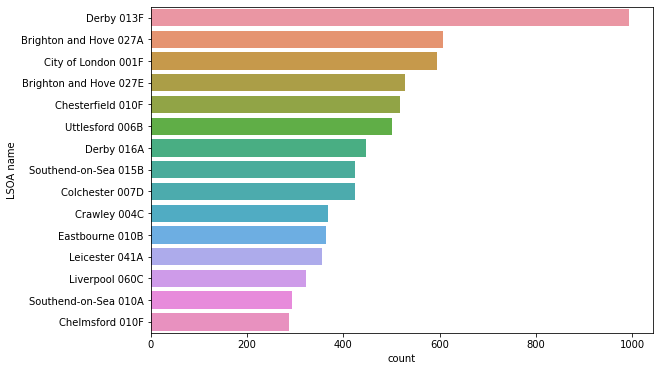

In [77]:
plt.figure(figsize = (9, 6))
sns.countplot(y= 'LSOA name', data = sep_df_antisocial, order = sep_df_antisocial['LSOA name'].value_counts().iloc[:15].index)

<AxesSubplot:xlabel='count', ylabel='LSOA name'>

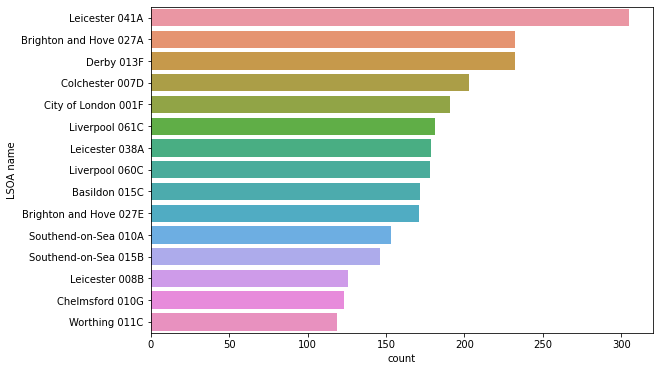

In [78]:
plt.figure(figsize = (9, 6))
sns.countplot(y= 'LSOA name', data = sep_df_criminal_damage, order = sep_df_criminal_damage['LSOA name'].value_counts().iloc[:15].index)

In [27]:
overall_city_crime_df

Crime ID    Month  \
Month                                                                    
2021-06-01                                                NaN  2021-06   
2021-06-01                                                NaN  2021-06   
2021-06-01                                                NaN  2021-06   
2021-06-01                                                NaN  2021-06   
2021-06-01  376695a32d3b1461123fac622438e2153f843354fd4b6b...  2021-06   
...                                                       ...      ...   
2022-06-01  037889d0c065a85f61389016511b0b7473c48166ded228...  2022-06   
2022-06-01  ec34694649d33e5e211c590c3388b0fbdc7f079d7bacf1...  2022-06   
2022-06-01  6a7fe7a1458ce128d97378a49e94b5b98a032977721d2b...  2022-06   
2022-06-01  97f007945164b1e02f53381e965830db54f7e54b118340...  2022-06   
2022-06-01  5f555b72010344b8d850871d10be848c64a8ccb8b9b110...  2022-06   

                       Falls within  Longitude   Latitude  \
Month                                                       
2021-06-01  Derbyshire Constabulary  -1.376412  53.098677   
2021-06-01  Derbyshire Constabulary  -1.373260  53.100835   
2021-06-01  Derbyshire Constabulary  -1.376752  53.101034   
2021-06-01  Derbyshire Constabulary  -1.376752  53.101034   
2021-06-01  Derbyshire Constabulary  -1.377638  53.098647   
...                             ...        ...        ...   
2022-06-01    Leicestershire Police        NaN        NaN   
2022-06-01    Leicestershire Police        NaN        NaN   
2022-06-01    Leicestershire Police        NaN        NaN   
2022-06-01    Leicestershire Police        NaN        NaN   
2022-06-01    Leicestershire Police        NaN        NaN   

                             Location  LSOA code          LSOA name  \
Month                                                                 
2021-06-01  On or near Mansfield Road  E01019400  Amber Valley 001A   
2021-06-01   On or near Salcombe Road  E01019400  Amber Valley 001A   
2021-06-01     On or near Meadow Lane  E01019400  Amber Valley 001A   
2021-06-01     On or near Meadow Lane  E01019400  Amber Valley 001A   
2021-06-01  On or near Mansfield Road  E01019400  Amber Valley 001A   
...                               ...        ...                ...   
2022-06-01                No Location        NaN                NaN   
2022-06-01                No Location        NaN                NaN   
2022-06-01                No Location        NaN                NaN   
2022-06-01                No Location        NaN                NaN   
2022-06-01                No Location        NaN                NaN   

                       Crime type        Last outcome category  
Month                                                           
2021-06-01  Anti-social behaviour                          NaN  
2021-06-01  Anti-social behaviour                          NaN  
2021-06-01  Anti-social behaviour                          NaN  
2021-06-01  Anti-social behaviour                          NaN  
2021-06-01           Public order  Unable to prosecute suspect  
...                           ...                          ...  
2022-06-01            Other crime          Under investigation  
2022-06-01            Other crime          Under investigation  
2022-06-01            Other crime          Under investigation  
2022-06-01            Other crime          Under investigation  
2022-06-01            Other crime          Under investigation  

[814936 rows x 10 columns]

<h3>Top 10 Cities (locations) for overall Crimes based on overall datasets</h3>

<AxesSubplot:xlabel='count', ylabel='LSOA name'>

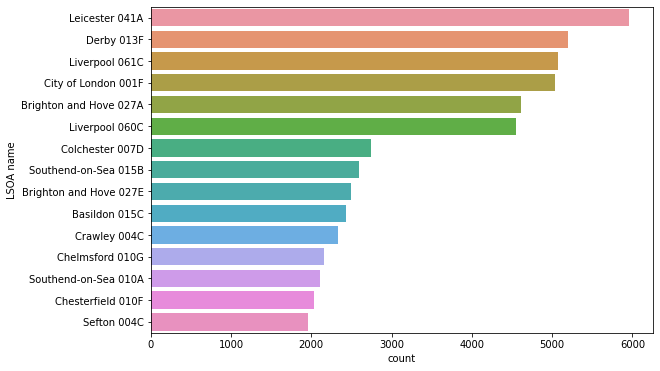

In [79]:
plt.figure(figsize = (9, 6))
sns.countplot(y= 'LSOA name', data = overall_city_crime_df, order = overall_city_crime_df['LSOA name'].value_counts().iloc[:15].index)

In [20]:
# Let's see how many null elements are contained in the data
#plt.figure(figsize=(10,10))
#sns.heatmap(derby_df.isnull(), cbar = False, cmap = 'YlGnBu')

In [21]:
overall_city_crime_df.drop([ 'Reported by','Context'], inplace=True, axis=1)

In [22]:
overall_city_crime_df.index = pd.DatetimeIndex(overall_city_crime_df.Month)

In [23]:
overall_city_crime_df['Crime type'].value_counts()

Violence and sexual offences    309504
Anti-social behaviour           123450
Public order                     88058
Criminal damage and arson        68965
Other theft                      51543
Vehicle crime                    38830
Shoplifting                      35280
Burglary                         27982
Drugs                            27732
Other crime                      14878
Bicycle theft                     8844
Theft from the person             7734
Possession of weapons             6693
Robbery                           5443
Name: Crime type, dtype: int64

In [64]:
#overall_city_crime_df.plot(x="Crime type", y=["Falls within"],
        #kind="barh", figsize=(10, 10))

#mp.show()

In [ ]:
#import matplotlib.pyplot as mp


<AxesSubplot:xlabel='count', ylabel='Crime type'>

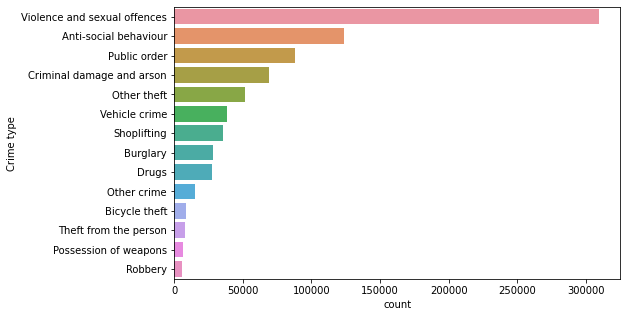

In [28]:
plt.figure(figsize = (8, 5))
sns.countplot(y= 'Crime type', data = overall_city_crime_df, order = overall_city_crime_df['Crime type'].value_counts().iloc[:15].index)

<AxesSubplot:xlabel='count', ylabel='Location'>

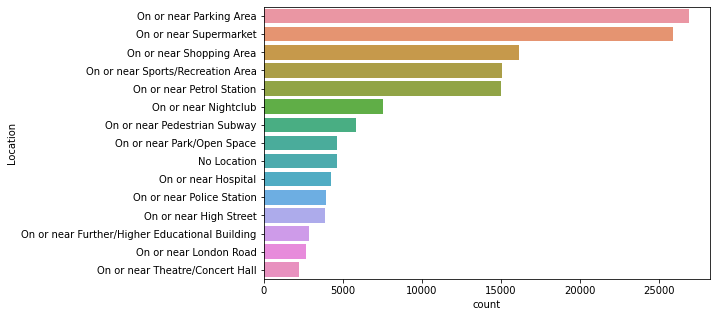

In [29]:
plt.figure(figsize = (8, 5))
sns.countplot(y= 'Location', data = overall_city_crime_df, order = overall_city_crime_df['Location'].value_counts().iloc[:15].index)

Text(0, 0.5, 'Number of Crimes')

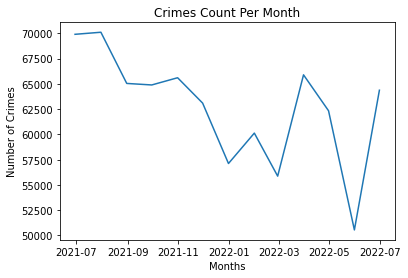

In [30]:
# Resample is a Convenience method for frequency conversion and resampling of time series.
plt.figure(figsize = (6, 4))
plt.plot(overall_city_crime_df.resample('M').size())

plt.title('Crimes Count Per Month')
plt.xlabel('Months')
plt.ylabel('Number of Crimes')


Text(0, 0.5, 'Number of Crimes')

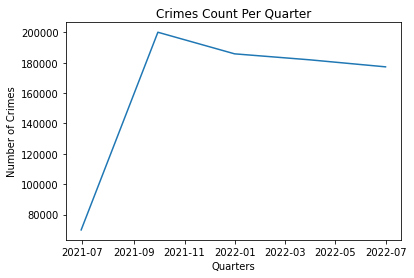

In [31]:
# Resample is a Convenience method for frequency conversion and resampling of time series.
plt.figure(figsize = (6, 4))
plt.plot(overall_city_crime_df.resample('Q').size())

plt.title('Crimes Count Per Quarter')
plt.xlabel('Quarters')
plt.ylabel('Number of Crimes')

In [33]:
overall_prophet = overall_city_crime_df.resample('M').size().reset_index()
overall_prophet.columns = ['Date', 'Crime Count']
overall_prophet_df = pd.DataFrame(overall_prophet)
overall_prophet

Date  Crime Count
0  2021-06-30        69904
1  2021-07-31        70108
2  2021-08-31        65044
3  2021-09-30        64893
4  2021-10-31        65607
5  2021-11-30        63098
6  2021-12-31        57122
7  2022-01-31        60130
8  2022-02-28        55872
9  2022-03-31        65894
10 2022-04-30        62340
11 2022-05-31        50552
12 2022-06-30        64372

In [35]:
import matplotlib.pyplot as mp


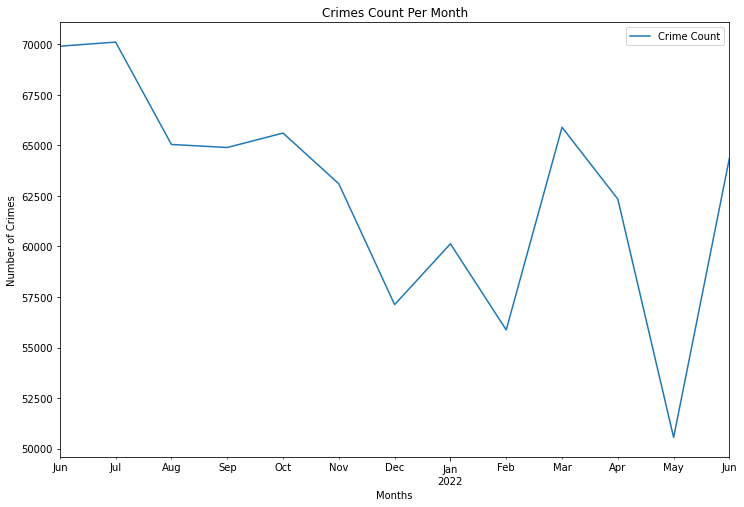

In [45]:

overall_prophet_df.plot(x="Date", y=["Crime Count"],
        kind="line", figsize=(12, 8))

plt.title('Crimes Count Per Month')
plt.xlabel('Months')
plt.ylabel('Number of Crimes')
mp.show()

<h3>Predictions for cities</h3>

In [49]:
overall_prophet_df_final = overall_prophet_df.rename(columns={'Date':'ds', 'Crime Count':'y'})
overall_prophet_df_final

ds      y
0  2021-06-30  69904
1  2021-07-31  70108
2  2021-08-31  65044
3  2021-09-30  64893
4  2021-10-31  65607
5  2021-11-30  63098
6  2021-12-31  57122
7  2022-01-31  60130
8  2022-02-28  55872
9  2022-03-31  65894
10 2022-04-30  62340
11 2022-05-31  50552
12 2022-06-30  64372

In [50]:
from fbprophet import Prophet

In [51]:
m = Prophet()
m.fit(overall_prophet_df_final)

# Forcasting into the future
future = m.make_future_dataframe(periods=450)
forecast = m.predict(future)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 9.
C:\Users\adity\anaconda3\lib\site-packages\fbprophet\forecaster.py:401: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  .astype(np.int)


<Figure size 216x72 with 0 Axes>

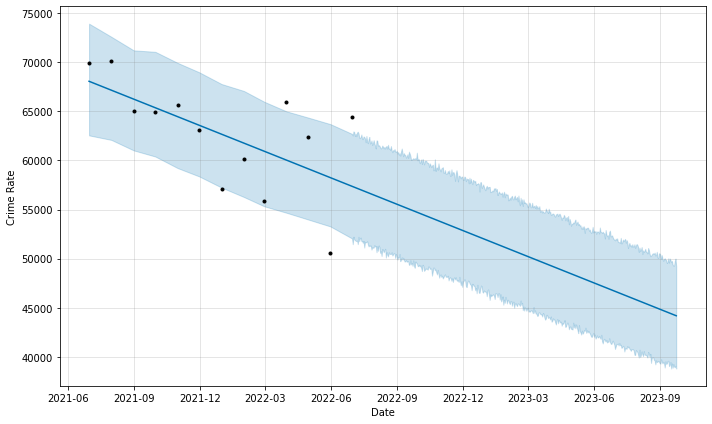

In [55]:
plt.figure(figsize = (3, 1))
figure = m.plot(forecast, xlabel='Date', ylabel='Crime Rate',figsize=(10, 6))


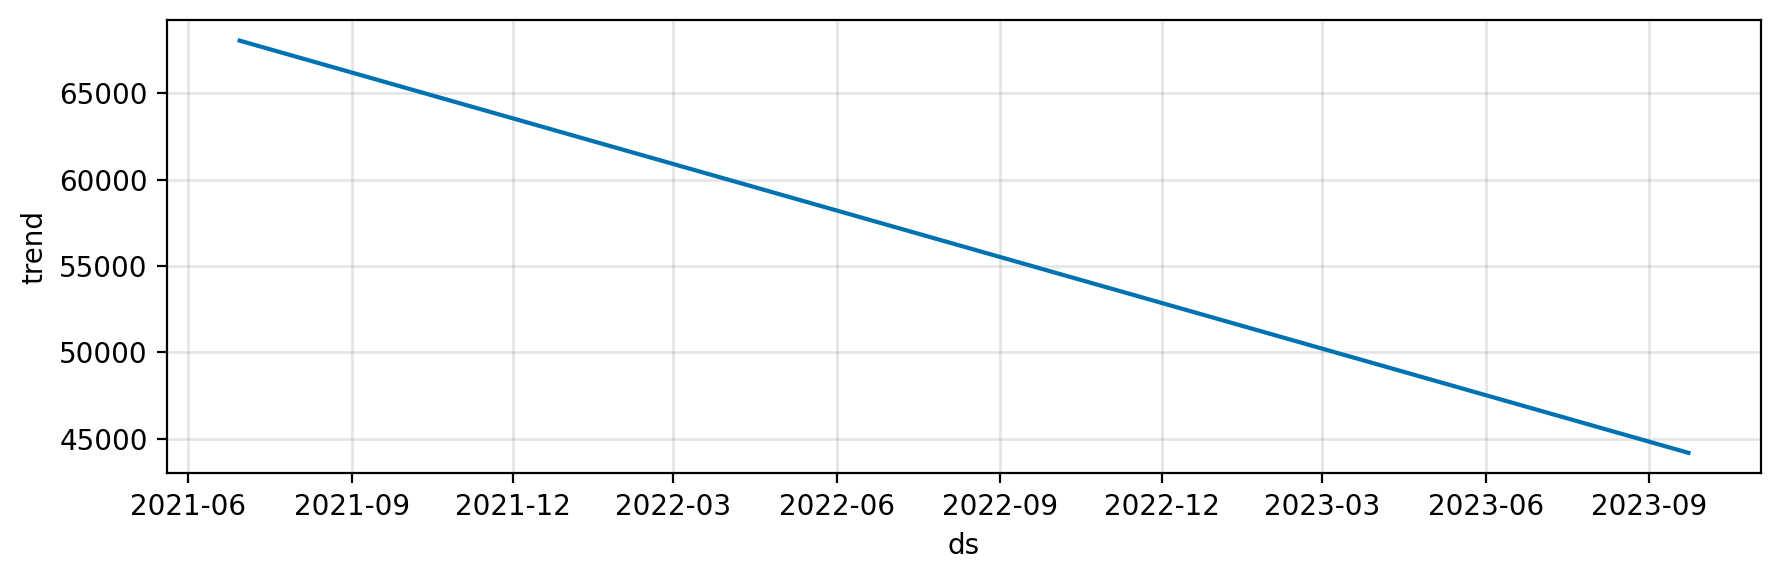

In [439]:
figure3 = m.plot_components(forecast)

In [440]:
Classes = overall_city_crime_df['Crime type'].unique()
Classes

array(['Anti-social behaviour', 'Public order',
       'Violence and sexual offences', 'Burglary',
       'Criminal damage and arson', 'Shoplifting', 'Vehicle crime',
       'Possession of weapons', 'Other crime', 'Drugs', 'Other theft',
       'Bicycle theft', 'Robbery', 'Theft from the person'], dtype=object)

In [441]:
# Splitting the Date to Day, Month, Year, Hour, Minute, Second
overall_city_crime_df['Months'] = pd.to_datetime(overall_city_crime_df['Month'])

overall_city_crime_df['Months'] = overall_city_crime_df['Months'].dt.month
#derby_df['Days'] = derby_df['Months'].dt.month
#derby_df['Day'] = derby_df['Month'].dt.day
#derby_df['Hour'] = derby_df['Month'].dt.hour
#derby_df['Minute'] = derby_df['Month'].dt.minute
#derby_df['Second'] = derby_df['Month'].dt.second 
overall_city_crime_df = overall_city_crime_df.drop(['Month'], axis=1) 

overall_city_crime_df.head()

Crime ID  \
Month                                                           
2021-06-01                                                NaN   
2021-06-01                                                NaN   
2021-06-01                                                NaN   
2021-06-01                                                NaN   
2021-06-01  376695a32d3b1461123fac622438e2153f843354fd4b6b...   

                       Falls within  Longitude   Latitude  \
Month                                                       
2021-06-01  Derbyshire Constabulary  -1.376412  53.098677   
2021-06-01  Derbyshire Constabulary  -1.373260  53.100835   
2021-06-01  Derbyshire Constabulary  -1.376752  53.101034   
2021-06-01  Derbyshire Constabulary  -1.376752  53.101034   
2021-06-01  Derbyshire Constabulary  -1.377638  53.098647   

                             Location  LSOA code          LSOA name  \
Month                                                                 
2021-06-01  On or near Mansfield Road  E01019400  Amber Valley 001A   
2021-06-01   On or near Salcombe Road  E01019400  Amber Valley 001A   
2021-06-01     On or near Meadow Lane  E01019400  Amber Valley 001A   
2021-06-01     On or near Meadow Lane  E01019400  Amber Valley 001A   
2021-06-01  On or near Mansfield Road  E01019400  Amber Valley 001A   

                       Crime type        Last outcome category  Months  
Month                                                                   
2021-06-01  Anti-social behaviour                          NaN       6  
2021-06-01  Anti-social behaviour                          NaN       6  
2021-06-01  Anti-social behaviour                          NaN       6  
2021-06-01  Anti-social behaviour                          NaN       6  
2021-06-01           Public order  Unable to prosecute suspect       6

In [442]:
# Convert Categorical Attributes to Numerical
#derby_df['Reported by'] = pd.factorize(derby_df["Reported by"])[0]
overall_city_crime_df['Falls within'] = pd.factorize(overall_city_crime_df["Falls within"])[0]
overall_city_crime_df['LSOA code'] = pd.factorize(overall_city_crime_df["LSOA code"])[0]
overall_city_crime_df['Crime ID'] = pd.factorize(overall_city_crime_df["Crime ID"])[0]
overall_city_crime_df['Location'] = pd.factorize(overall_city_crime_df["Location"])[0]
overall_city_crime_df['LSOA name'] = pd.factorize(overall_city_crime_df["LSOA name"])[0]
overall_city_crime_df['Last outcome category'] = pd.factorize(overall_city_crime_df["Last outcome category"])[0] 

In [443]:
#Encode target labels into categorical variables:
overall_city_crime_df['Crime type'] = pd.factorize(overall_city_crime_df["Crime type"])[0] 
overall_city_crime_df['Crime type'].unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13],
      dtype=int64)

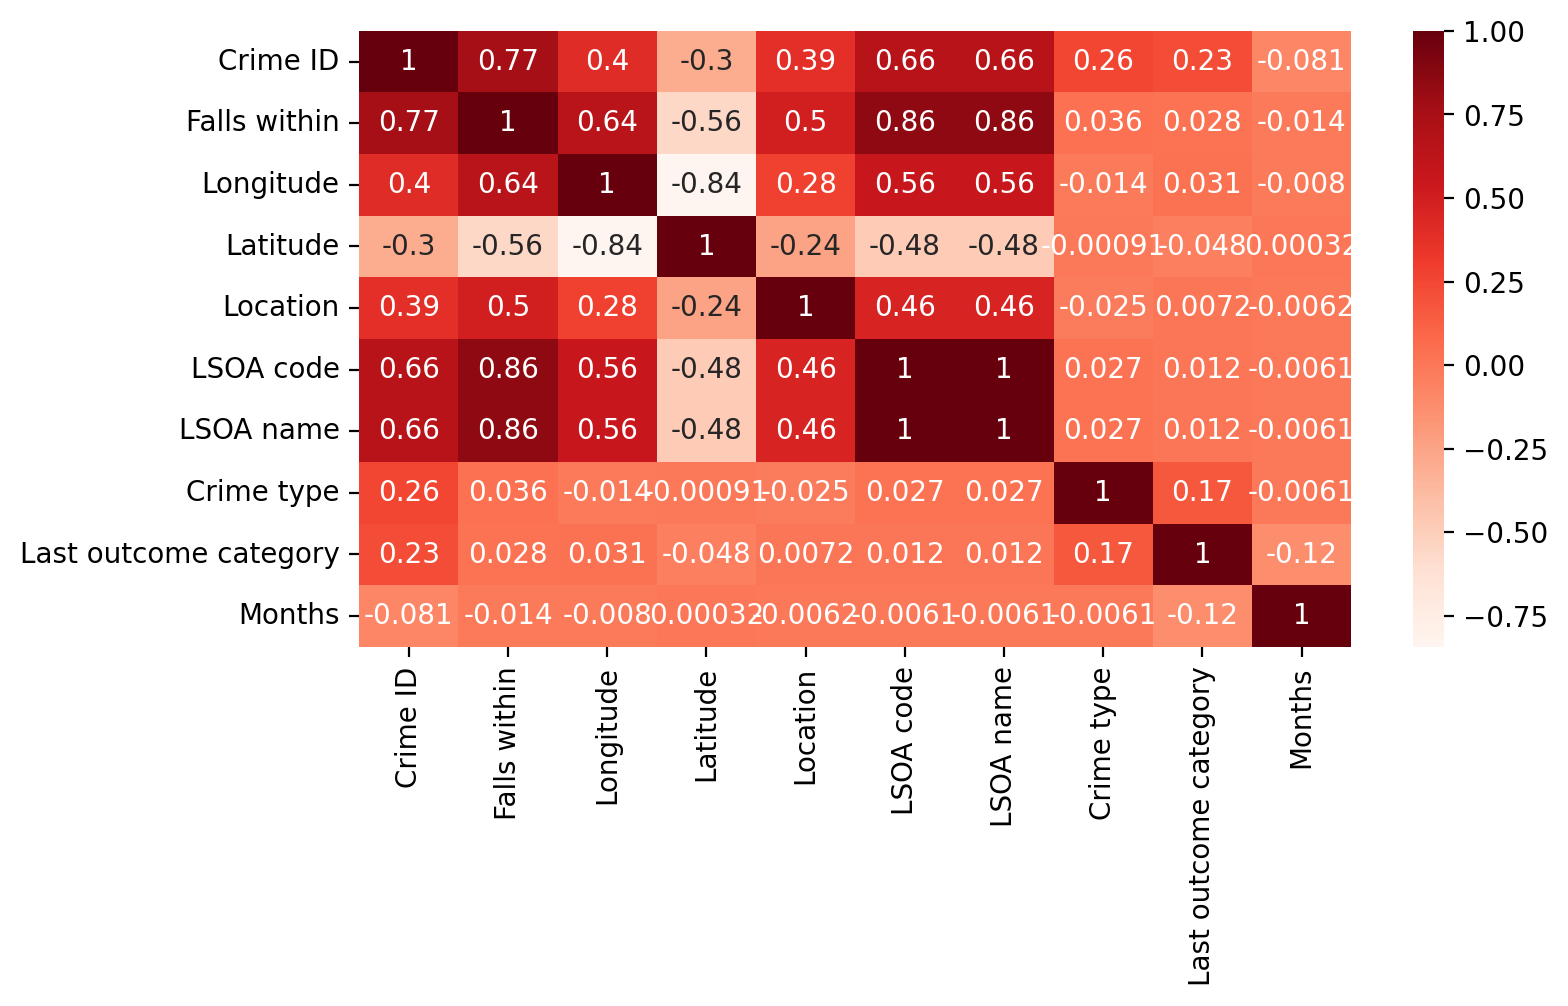

In [444]:
# Feature Selection using Filter Method 
# Split Dataframe to target class and features
X_fs = overall_city_crime_df.drop(['Crime type'], axis=1)
Y_fs = overall_city_crime_df['Crime type']

#Using Pearson Correlation
plt.figure(figsize=(8,4))
cor = overall_city_crime_df.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

In [445]:
#Correlation with output variable
cor_target = abs(cor['Crime type'])
#Selecting highly correlated features
relevant_features = cor_target[cor_target>0.2]
relevant_features

Crime ID      0.258006
Crime type    1.000000
Name: Crime type, dtype: float64

In [456]:
# At Current Point, the attributes is select manually based on Feature Selection Part. 
Features = ["Crime ID"]
print('Full Features: ', Features)

Target = 'Crime type'
print('Target: ', Target)

Full Features:  ['Crime ID']
Target:  Crime type


In [457]:
#Split dataset to Training Set & Test Set
x, y = train_test_split(overall_city_crime_df, 
                        test_size = 0.2, 
                        train_size = 0.8, 
                        random_state= 3)

x1 = x[Features]    #Features to train
x2 = x[Target]      #Target Class to train
y1 = y[Features]    #Features to test
y2 = y[Target]      #Target Class to test

print('Feature Set Used    : ', Features)
print('Target Class        : ', Target)
print('Training Set Size   : ', x.shape)
print('Test Set Size       : ', y.shape)

Feature Set Used    :  ['Crime ID']
Target Class        :  Crime type
Training Set Size   :  (651948, 10)
Test Set Size       :  (162988, 10)


In [458]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, confusion_matrix, classification_report, accuracy_score, f1_score

# ML Libraries
from sklearn.ensemble import RandomForestClassifier,VotingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier

# Evaluation Metrics
#from yellowbrick.classifier import ClassificationReport
from sklearn import metrics

In [459]:
# Random Forest
# Create Model with configuration
rf_model = RandomForestClassifier(n_estimators=70, # Number of trees
                                  min_samples_split = 30,
                                  bootstrap = True, 
                                  max_depth = 50, 
                                  min_samples_leaf = 25)

# Model Training
rf_model.fit(X=x1,
             y=x2)

# Prediction
result = rf_model.predict(y[Features])

C:\Users\adity\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:569: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y_store_unique_indices = np.zeros(y.shape, dtype=np.int)
C:\Users\adity\anaconda3\lib\site-packages\sklearn\tree\_classes.py:190: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your

In [460]:
# Model Evaluation
ac_sc = accuracy_score(y2, result)
rc_sc = recall_score(y2, result, average="weighted")
pr_sc = precision_score(y2, result, average="weighted")
f1_sc = f1_score(y2, result, average='micro')
confusion_m = confusion_matrix(y2, result)

print("========== Random Forest Results ==========")
print("Accuracy    : ", ac_sc)
print("Recall      : ", rc_sc)
print("Precision   : ", pr_sc)
print("F1 Score    : ", f1_sc)
print("Confusion Matrix: ")
print(confusion_m)

========== Random Forest Results ==========
Accuracy    :  0.5661950573048322
Recall      :  0.5661950573048322
Precision   :  0.5265631628367616
F1 Score    :  0.5661950573048322
Confusion Matrix: 
[[24898     0     0     0     0     0     0     0     0     0     0     0
      0     0]
 [    1  2101 14155     9   218   552    76    10     3    72   212    15
      0    10]
 [    0   533 60528    27   298   211   120     3     8    38   130    21
      0    11]
 [    0   184  4793    36   166    52    25     0     1    39    83    35
      0     6]
 [    0   509 12090    15   661   177    48     0     3   129   185    59
      0    10]
 [    0   660  4153     2    56  1895    51    11     3     5    96    18
      0    43]
 [    0   205  6936     9    63   154   263     3     3     5    70     6
      0    38]
 [    0   122   977     2    29    51     7    33     1    11    77     3
      0     1]
 [    0    47  2837     2    32    17     9     0    32     8    23     2
      0     8]


C:\Users\adity\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
